In [1]:
%load_ext autoreload
%autoreload 2

In [69]:
import sys
import os
from matplotlib import pyplot as plt
from pprint import pprint
from intake import open_esm_datastore
import pandas as pd
import cftime
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore'
sys.path.append(tool_dir)
from common_functions import _expt_name_combo, _read_ryaml, plot_time_series_combo, plot_time_series_combo2, _set_default_plt_params, plot2d, plot3d,plot3d2


In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [58]:
yaml_input = 'Expts_manager_short_instan_runs.yaml'
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
MOM_contrl_dir = yaml_input['base_dir_name']
contrl_name = 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0'

MOM_expt_dir1 = yaml_input['namelists']['MOM_input']['MOM_expt_dir1']
MOM_list1_combo = yaml_input['namelists']['MOM_input']['MOM_list1_combo']
expt_names = _expt_name_combo(MOM_list1_combo)

MOM_dirs = [MOM_contrl_dir]+list(MOM_expt_dir1)
MOM_dirs = list(MOM_expt_dir1)
#pprint(MOM_dirs)
MOM_names = [contrl_name] + list(expt_names)
MOM_names = list(expt_names)
#pprint(MOM_names)

In [4]:
output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1'
intake_esm_ds = 'intake_esm_ds.json'

In [59]:
datastore_tot = []
MOM_dirs_tot = []
MOM_names_tot = []
for i,j in zip(MOM_dirs,MOM_names):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    datastore_path = os.path.join(f"{archive_path}",intake_esm_ds)
    if os.path.isfile(datastore_path):
        datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
        datastore_tot.append(datastore)
        MOM_dirs_tot.append(f"{i}")
        MOM_names_tot.append(f"{j}")
pprint(MOM_dirs_tot)
pprint(MOM_names_tot)
pprint(datastore_tot)

['expt0',
 'expt1',
 'expt2',
 'expt7',
 'expt8',
 'expt9',
 'expt10',
 'expt11',
 'expt12',
 'expt13',
 'expt14',
 'expt15']
['DT_THERM_3600_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_108000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_108000',
 'DT_THERM_108000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESE

In [60]:
datastore_tot[1].df.variable

0      [time_bounds, NCAT, VGRDi, VGRDs, VGRDb, VGRDa...
1                                             [Heat_PmE]
2                                                [Rd_dx]
3                                                  [SSH]
4                                                  [SSU]
5                                                  [SSV]
6                                             [S_adx_2d]
7                                             [S_ady_2d]
8                                           [S_diffx_2d]
9                                           [S_diffy_2d]
10                                            [T_adx_2d]
11                                            [T_ady_2d]
12                                          [T_diffx_2d]
13                                          [T_diffy_2d]
14                                                 [evs]
15                                            [ficeberg]
16                                              [friver]
17                             

In [61]:
extracted_MOM_names_tot = ['_'.join(i.split('_')[:3]) for i in MOM_names_tot]
extracted_MOM_names_tot[0] = 'Contrl_DT_THERM_1800'
extracted_MOM_names_tot

['Contrl_DT_THERM_1800',
 'DT_THERM_108000',
 'DT_THERM_108000',
 'DT_THERM_54000',
 'DT_THERM_54000',
 'DT_THERM_36000',
 'DT_THERM_36000',
 'DT_THERM_18000',
 'DT_THERM_18000',
 'DT_THERM_7200',
 'DT_THERM_7200',
 'DT_THERM_3600']

## Instantaneous snapshots

- **DT_THERM**: 
  [108000.0, 54000.0, 36000.0, 18000.0, 7200.0, 1800.0]
  
- **DIABATIC_FIRST**: 
  [False   , False  , False  , False  , False , True]
  
- **THERMO_SPANS_COUPLING**: 
  [True, True, True, True, True, False]

- **COUPLING time step**:
  3600.0

  
|#| **DT_THERM** | **DIABATIC_FIRST** | **THERMO_SPANS_COUPLING** |
|----|--------------|---------------------|---------------------------|
|1| 108000.0     | False               | True                      |
|2| 54000.0      | False               | True                      |
|3| 36000.0      | False               | True                      |
|4| 18000.0      | False               | True                      |
|5| 7200.0       | False               | True                      |
|Contrl| 1800.0       | True                | False                     |

1. Control experiment spins 15 years
2. Total runlength: 60 hours

In [62]:
_set_default_plt_params()

## T_adx Instantaneous snapshots 1915-01-02 06:00:00

In [63]:
datastore_tot
extracted_MOM_names_tot

['Contrl_DT_THERM_1800',
 'DT_THERM_108000',
 'DT_THERM_108000',
 'DT_THERM_54000',
 'DT_THERM_54000',
 'DT_THERM_36000',
 'DT_THERM_36000',
 'DT_THERM_18000',
 'DT_THERM_18000',
 'DT_THERM_7200',
 'DT_THERM_7200',
 'DT_THERM_3600']

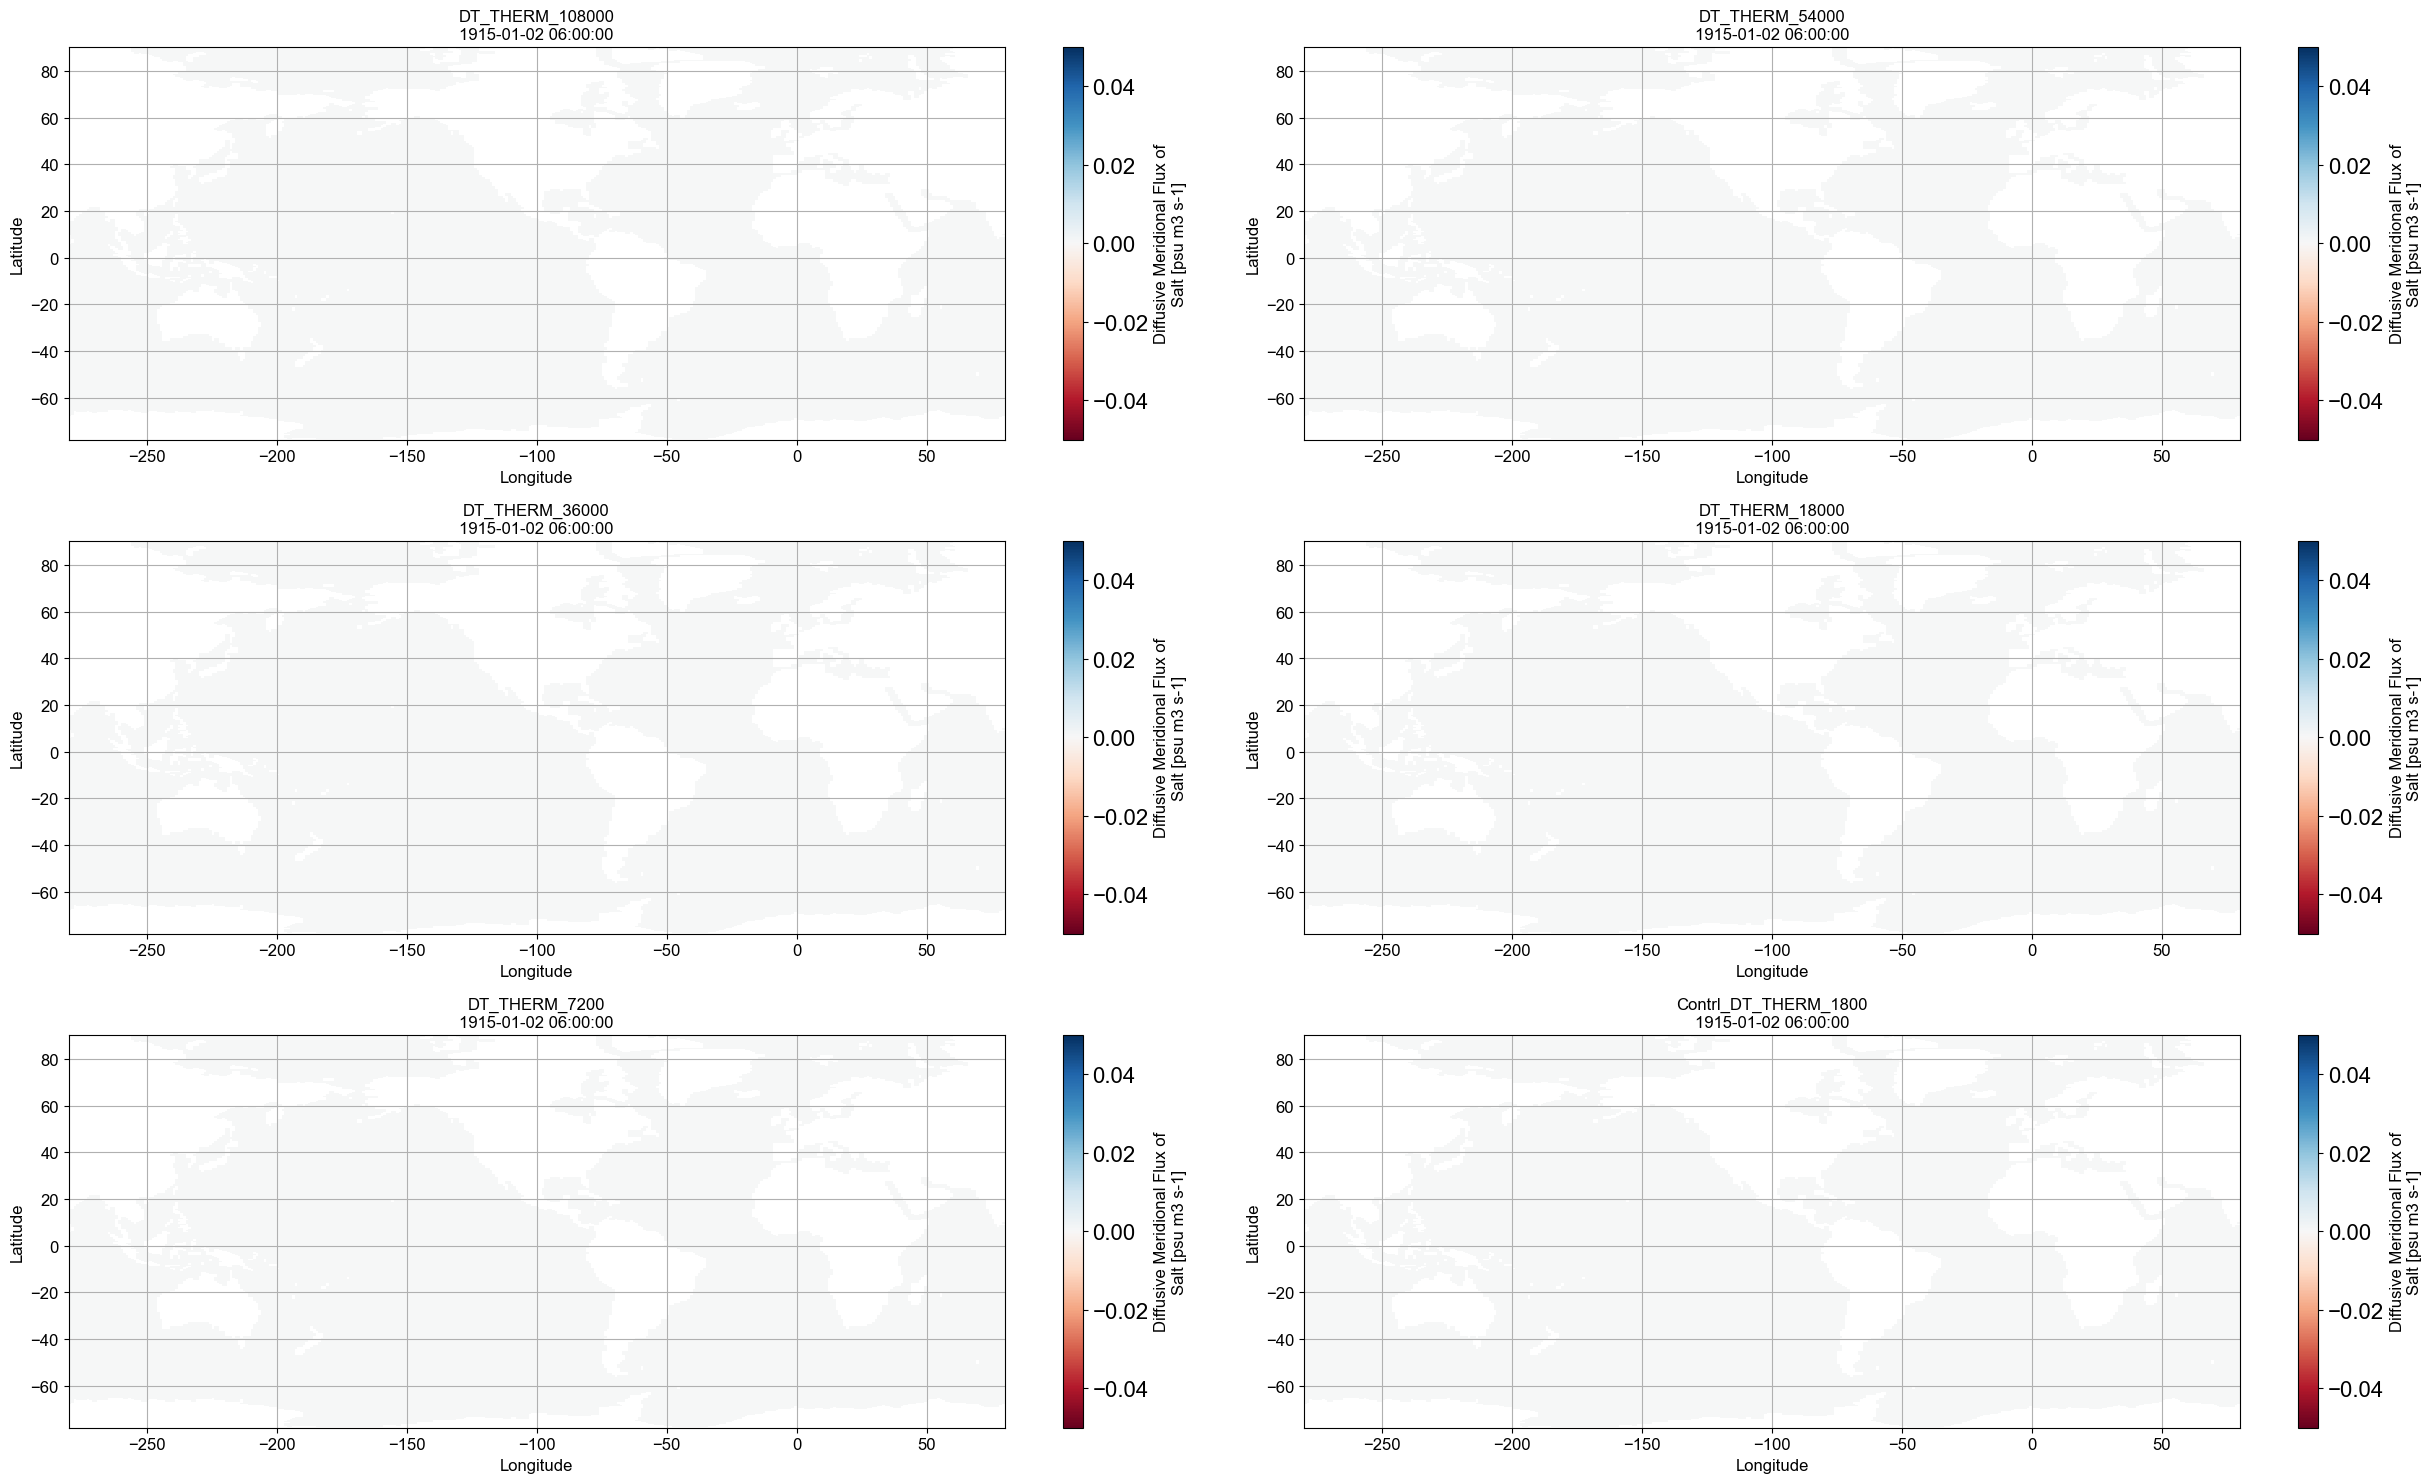

In [64]:
var = 'S_diffy'
common_time = pd.Timestamp('1915-01-02 06:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = [2,4,6,8,10,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d(datastore_expts, MOM_names_expts, var,depth_level = 0,
       time_selection = 'index', time_index = -1,common_time = common_time,ncols=2,figsize=(25,15))

## T_adx Instantaneous snapshots (compared to the control run) 1915-01-02 06:00:00

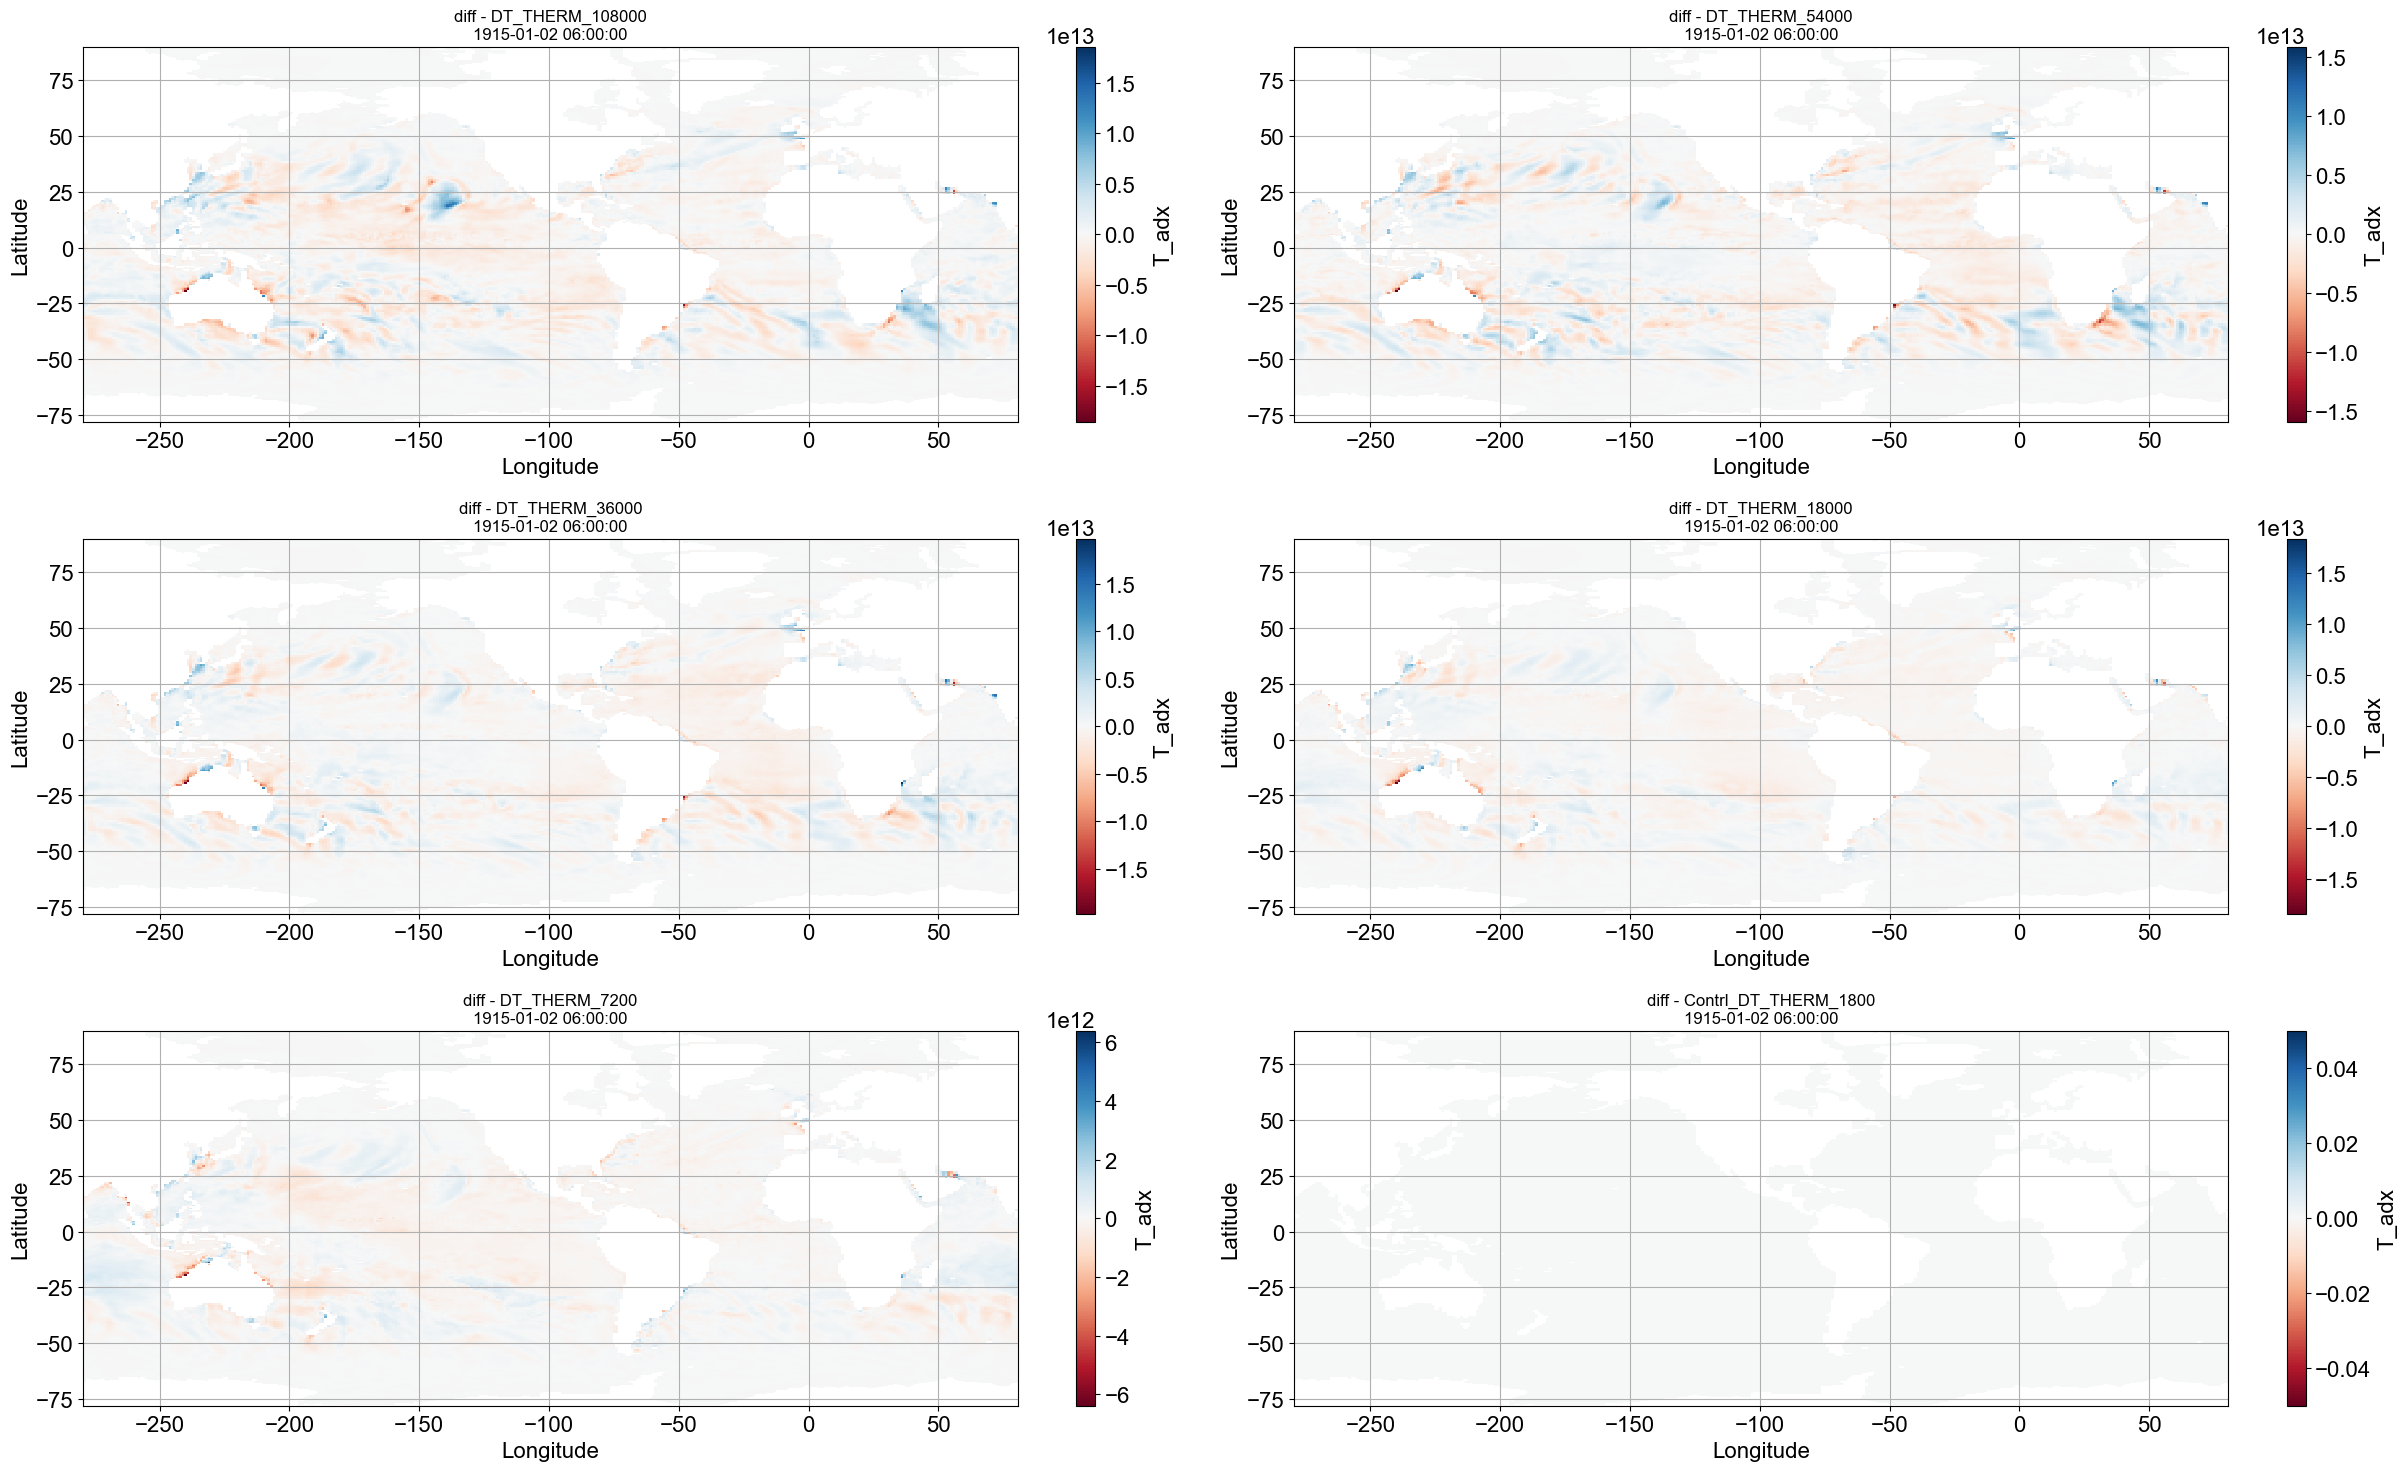

In [9]:
var = 'T_adx'
common_time = pd.Timestamp('1915-01-02 06:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
datastore_ctrl = datastore_tot[0]
tmp_indx = [2,4,6,8,10,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d(datastore_expts,
       MOM_names_expts,
       var,
       common_time = common_time,
       ncols=2,
       figsize=(25,15),
       depth_level = 0,
       datastore_ctrl = datastore_ctrl)

## T_adx Instantaneous snapshots (compared to the control run) 1915-01-03 12:00:00

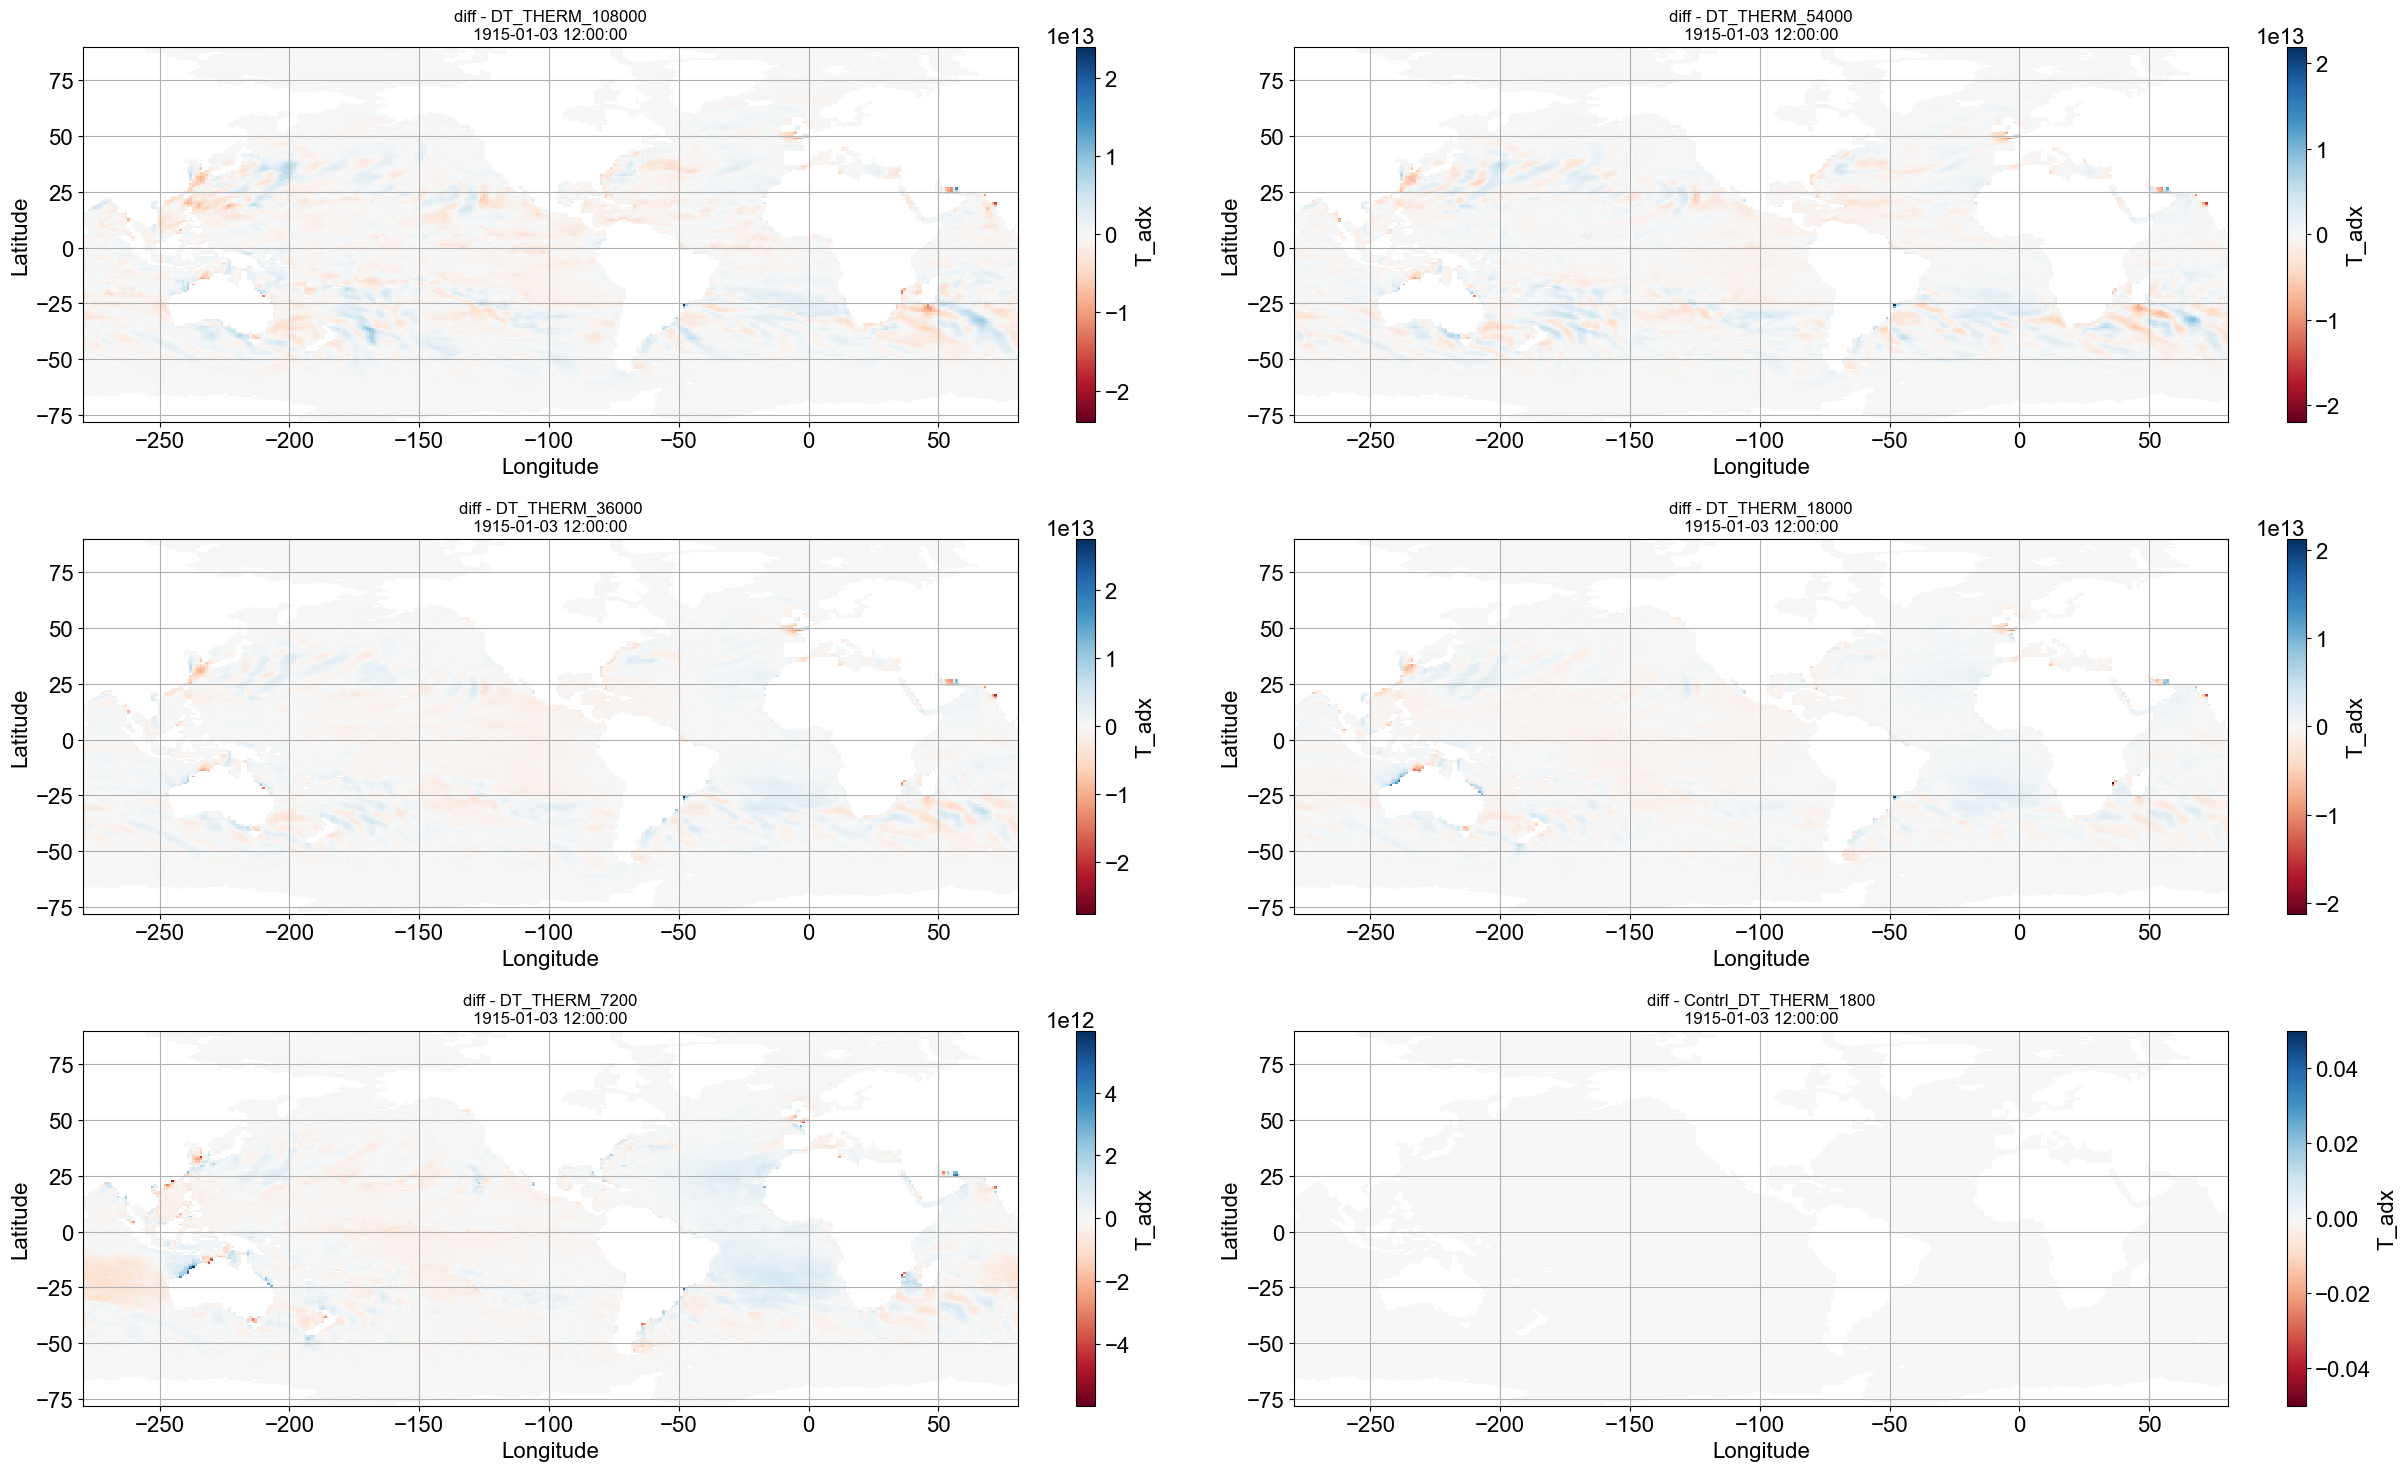

In [10]:
var = 'T_adx'
common_time = pd.Timestamp('1915-01-03 12:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
datastore_ctrl = datastore_tot[0]
tmp_indx = [2,4,6,8,10,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d(datastore_expts,
       MOM_names_expts,
       var,
       common_time = common_time,
       ncols=2,
       figsize=(25,15),
       depth_level = 0,
       datastore_ctrl = datastore_ctrl)

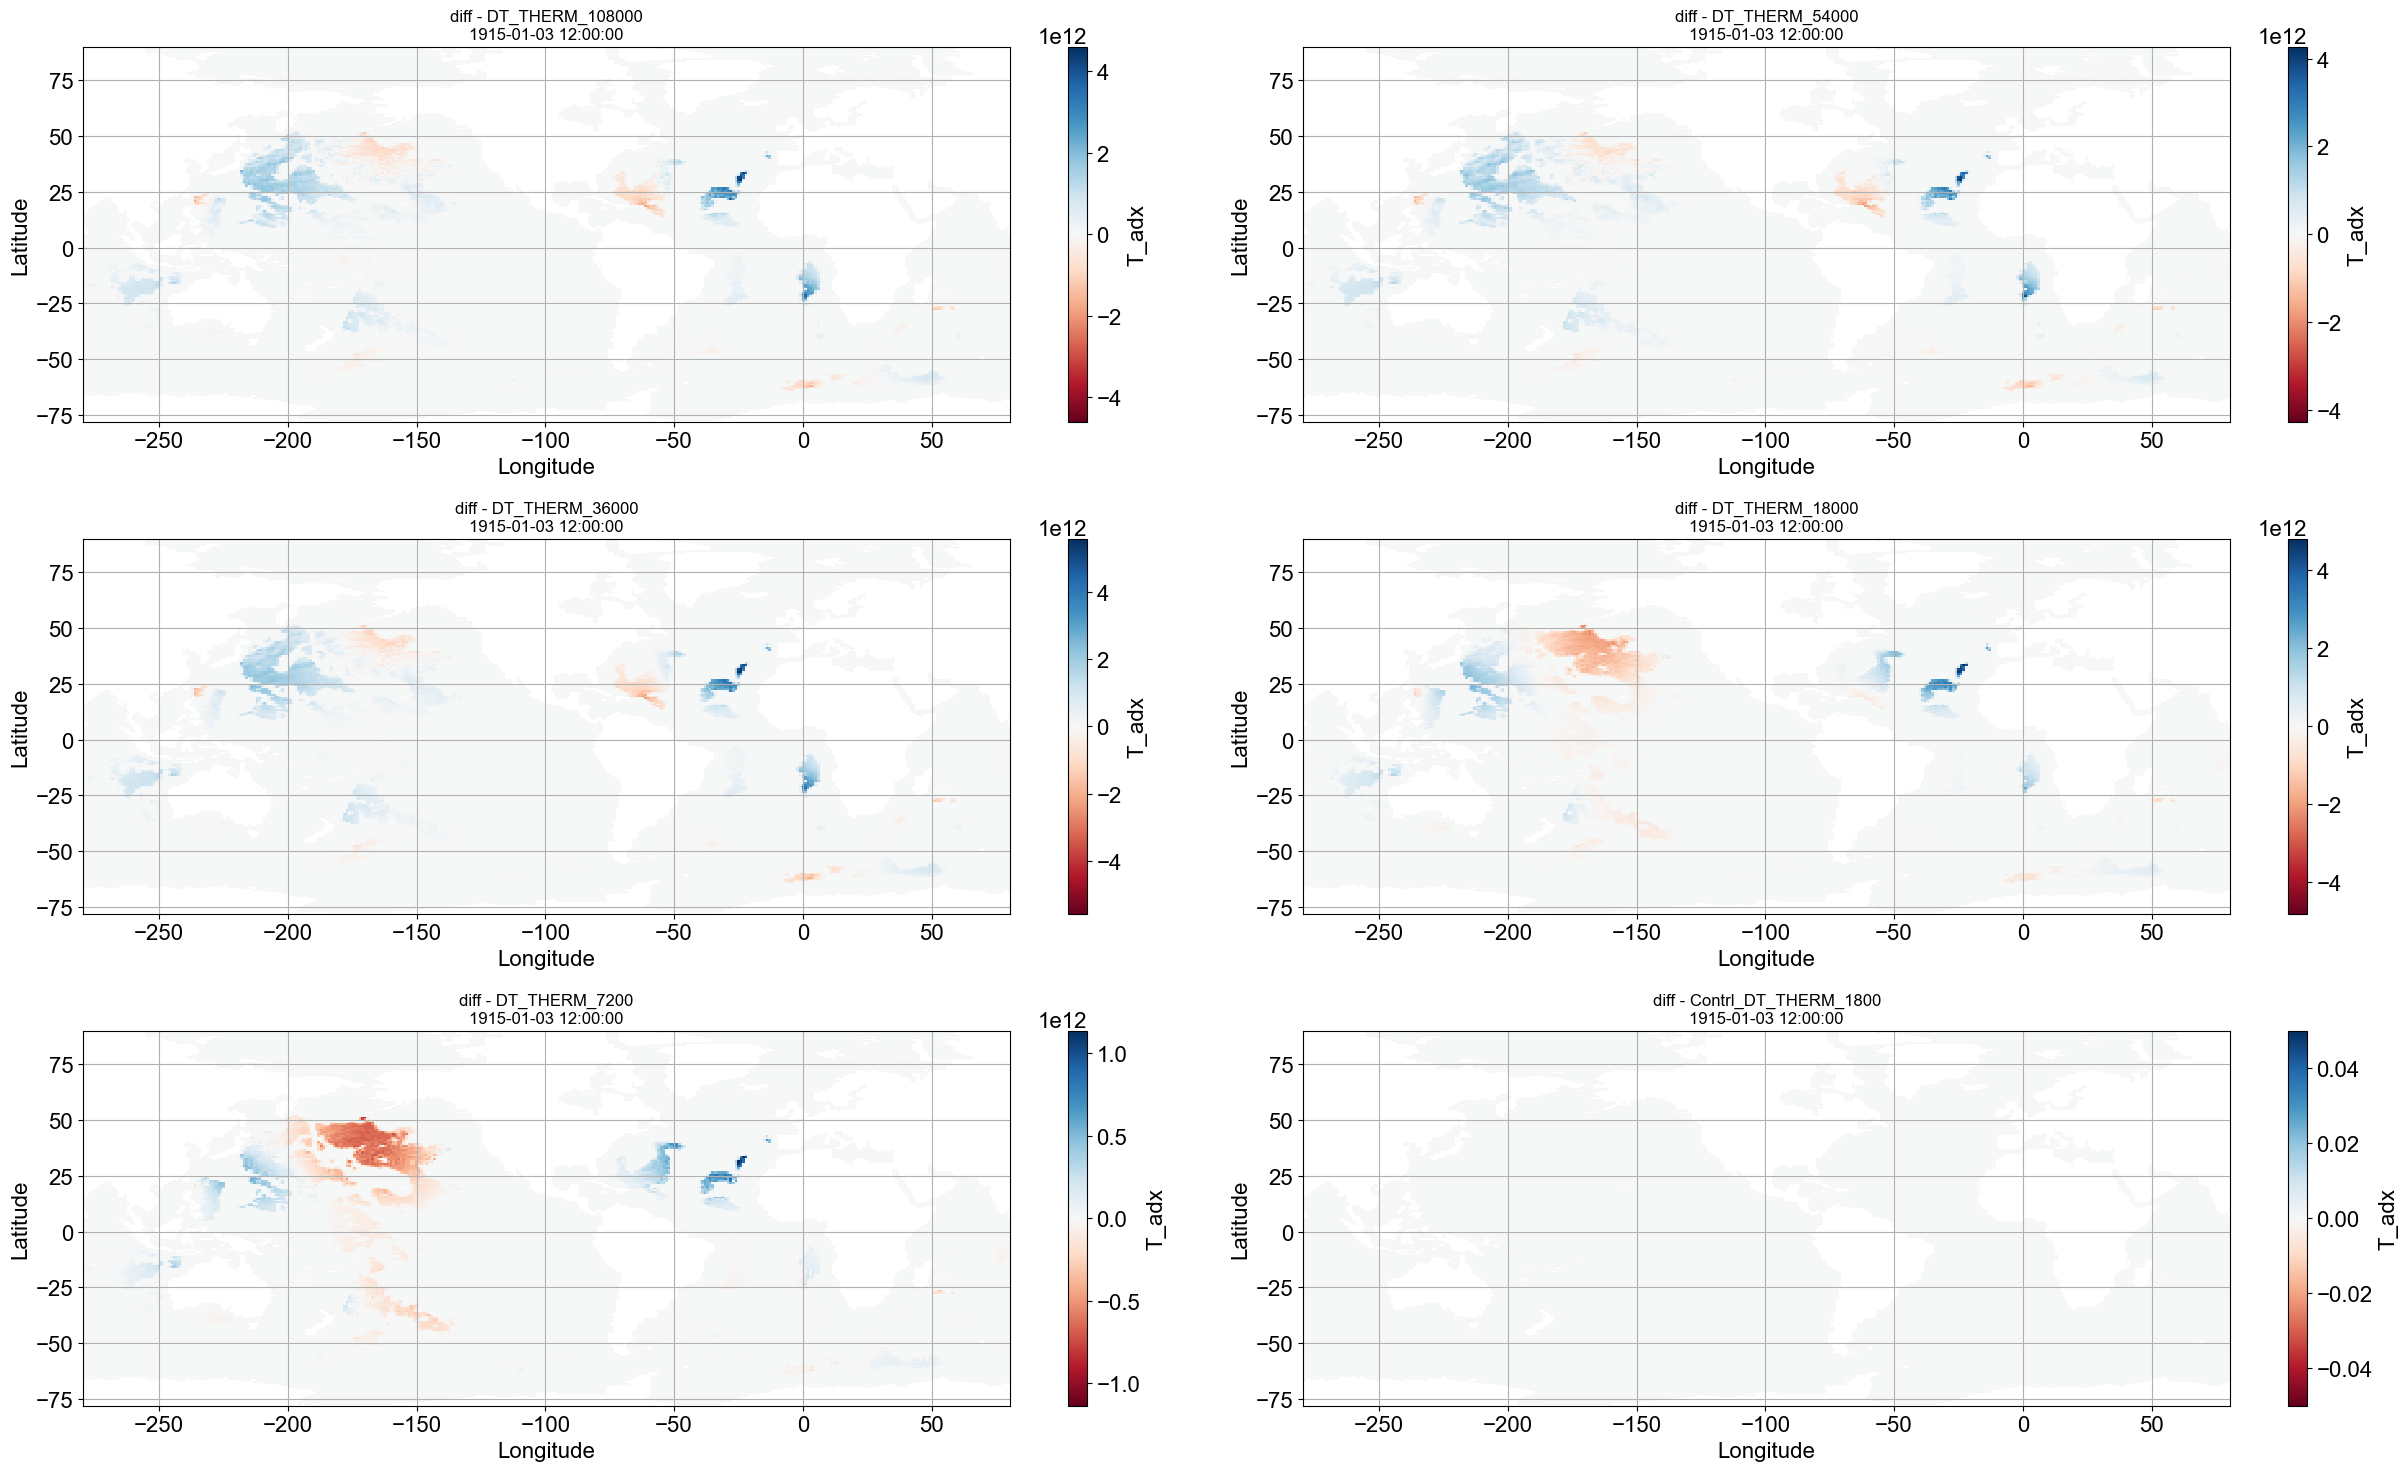

In [11]:
var = 'T_adx'
common_time = pd.Timestamp('1915-01-03 12:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
datastore_ctrl = datastore_tot[0]
tmp_indx = [2,4,6,8,10,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d(datastore_expts,
       MOM_names_expts,
       var,
       common_time = common_time,
       ncols=2,
       figsize=(25,15),
       depth_level = -1,
       datastore_ctrl = datastore_ctrl)

## T_adx_2d Instantaneous snapshots 1915-01-03 12:00:00

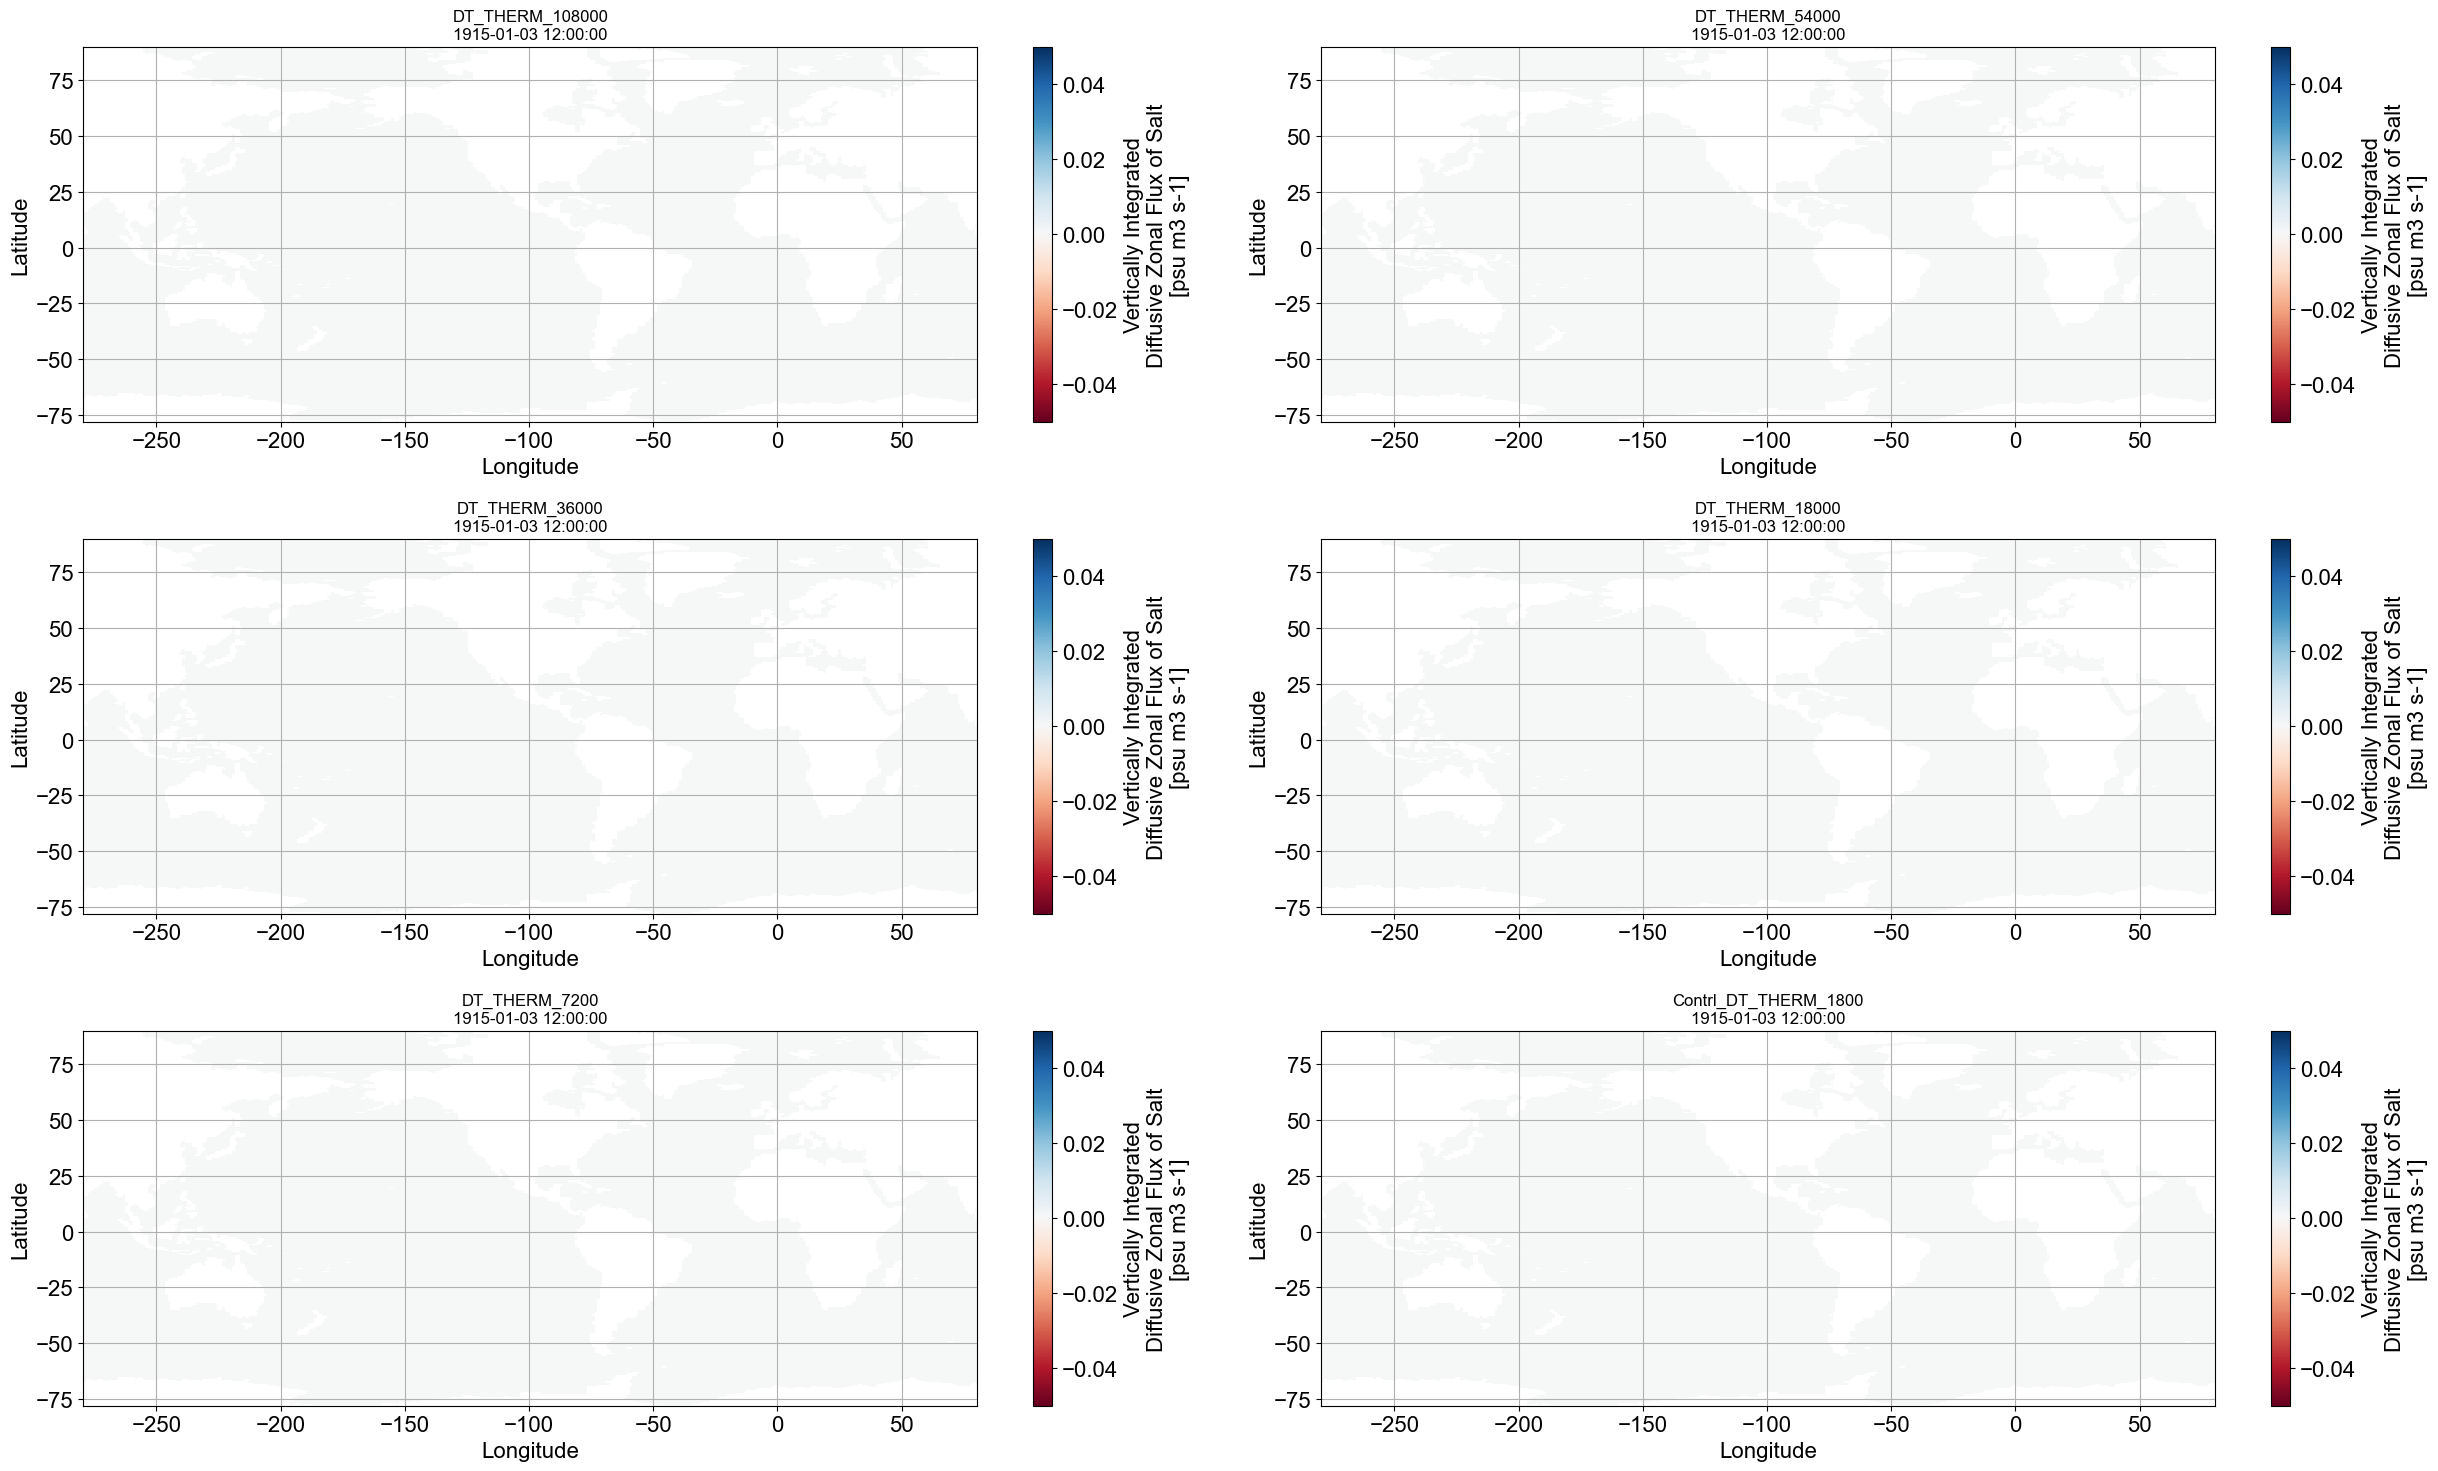

In [17]:
var = 'S_diffx_2d'
common_time = pd.Timestamp('1915-01-03 12:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
tmp_indx = [2,4,6,8,10,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d(datastore_expts,
       MOM_names_expts,
       var,
       common_time = common_time,
       ncols=2,
       figsize=(25,15))

## T_adx_2d Instantaneous snapshots (compared to the control run) 1915-01-03 12:00:00

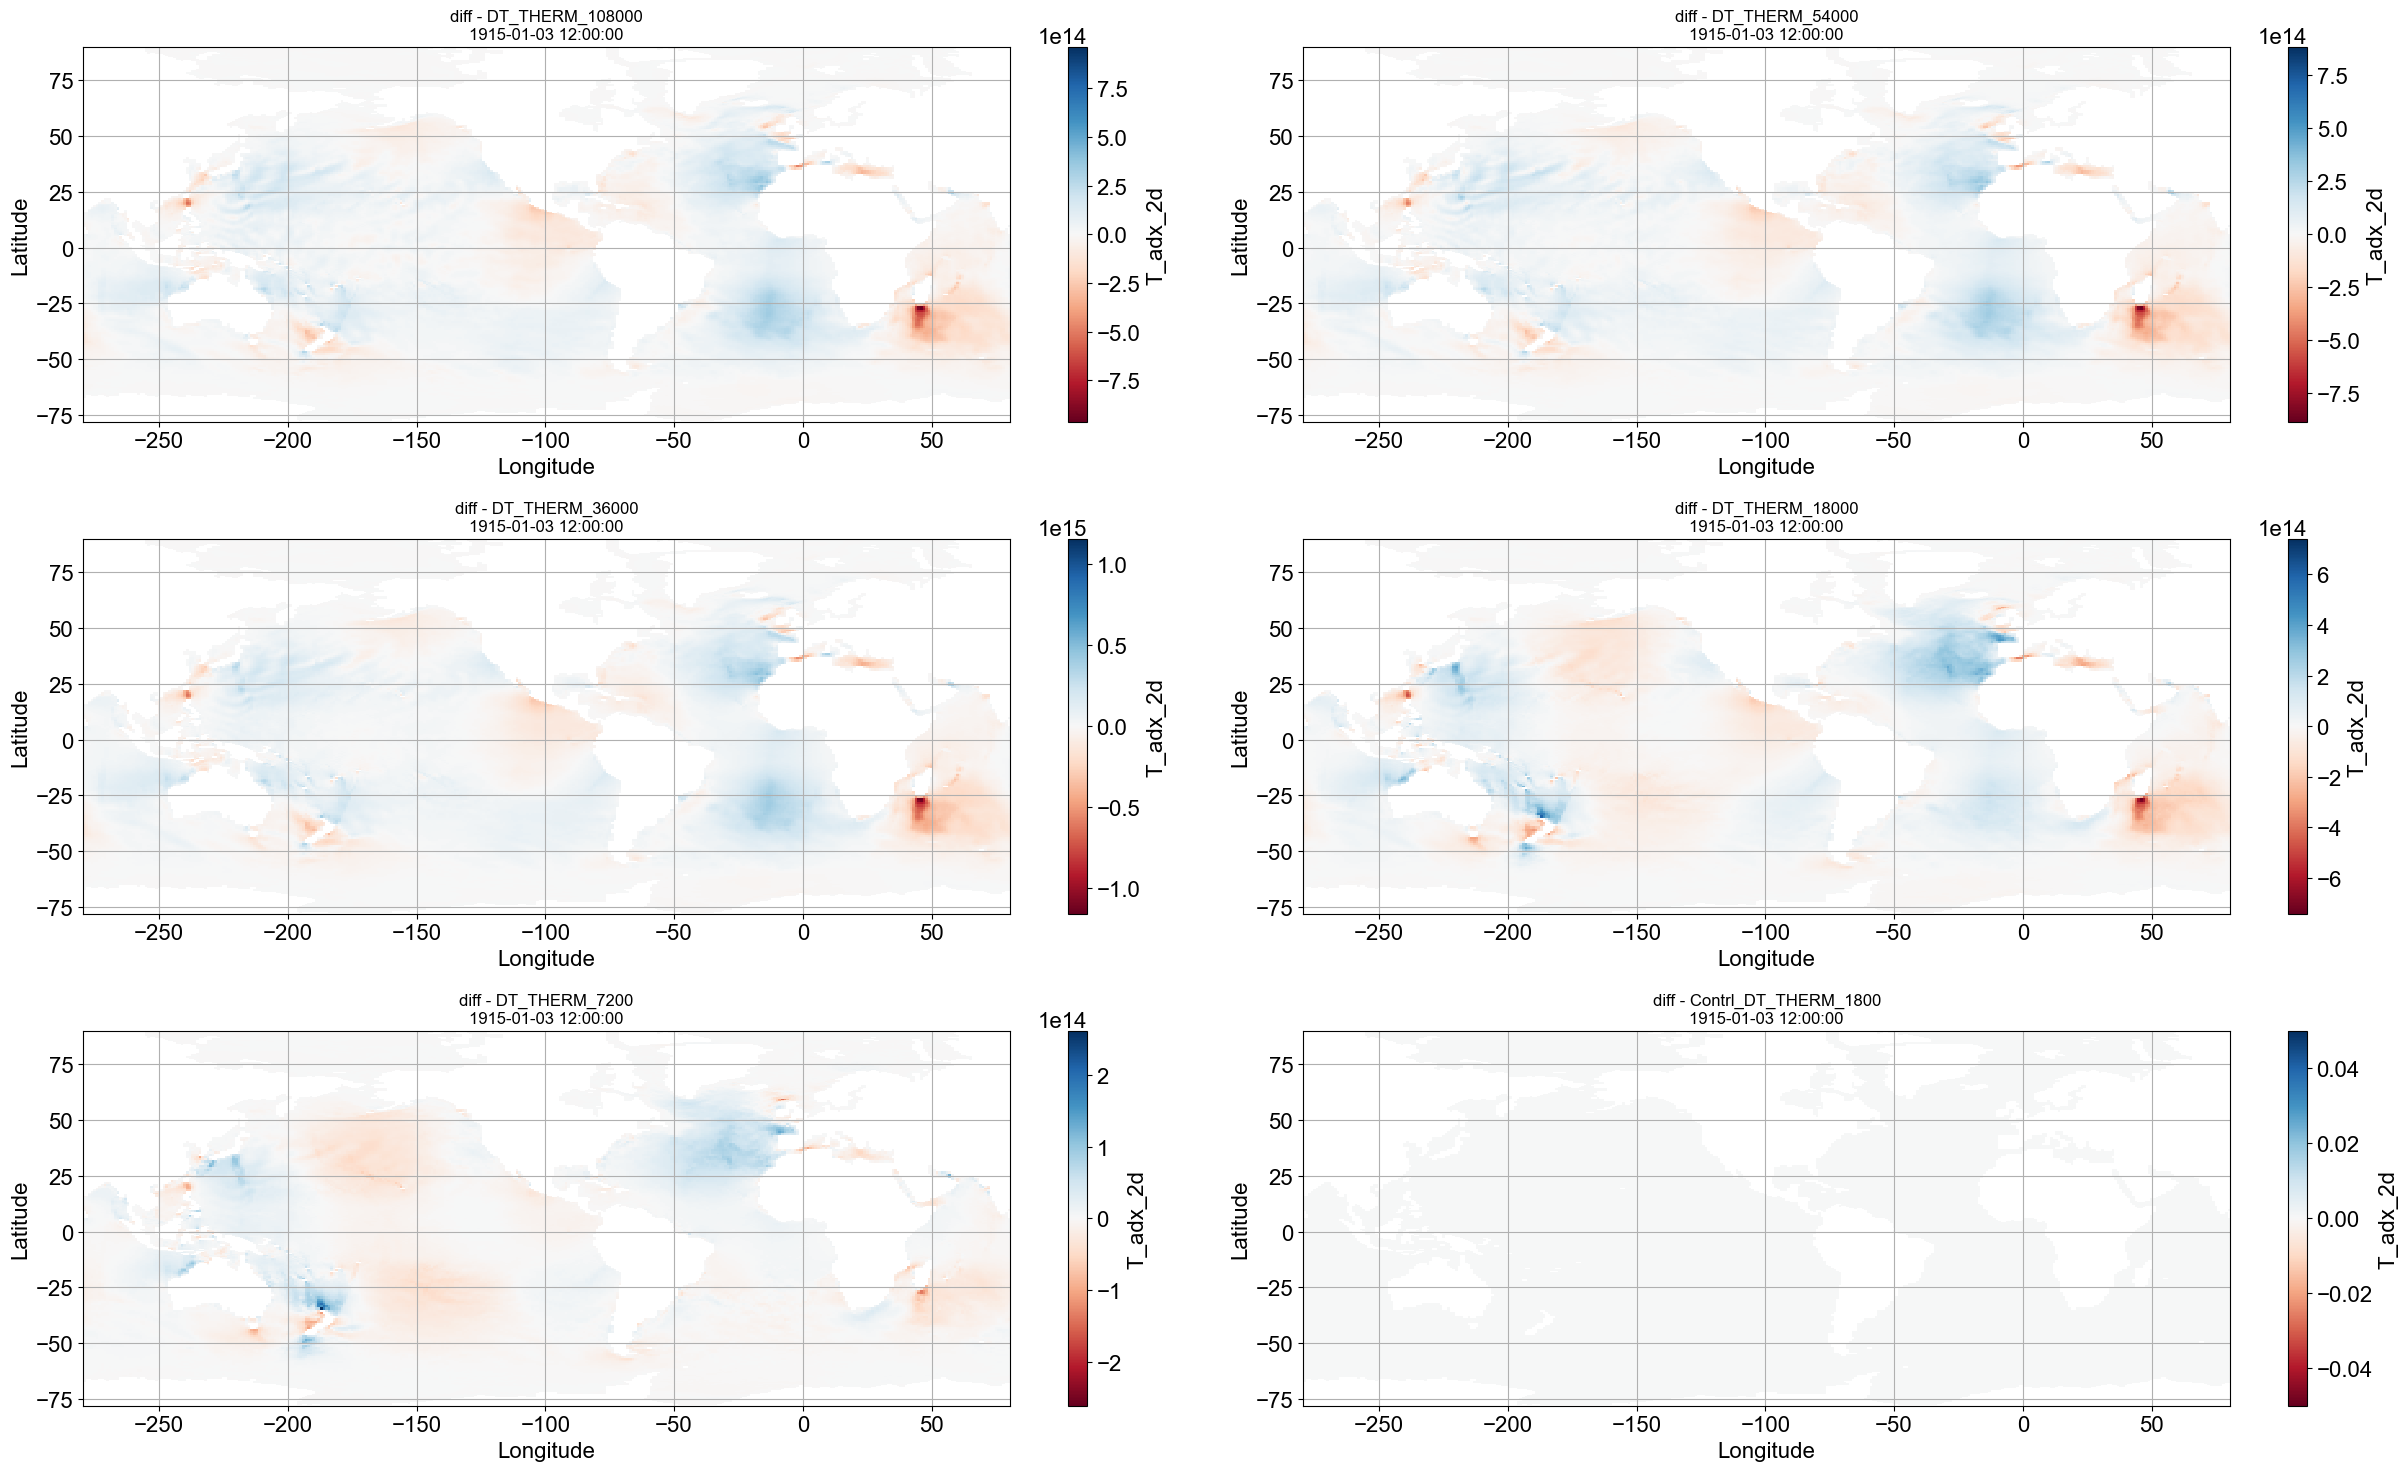

In [13]:
var = 'T_adx_2d'
common_time = pd.Timestamp('1915-01-03 12:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
datastore_ctrl = datastore_tot[0]
tmp_indx = [2,4,6,8,10,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
plot3d(datastore_expts,
       MOM_names_expts,
       var,
       common_time = common_time,
       ncols=2,
       figsize=(25,15),
       datastore_ctrl = datastore_ctrl)

In [81]:

for i,j in zip(MOM_dirs,MOM_names):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    
path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1'
ds = open_esm_datastore(
    path + '/intake_datastore.json',
    columns_with_iterables=["variable"]
)

name_ds_pairs = [(iRun, open_by_path(RUNS[iRun], VARS)) for iRun in RUNS.keys()]    

FileNotFoundError: [Errno 2] No such file or directory: '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1/intake_datastore.json'

In [ ]:
yaml_input = 'Expts_manager_10_year_insan_runs.yaml'
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
MOM_contrl_dir = yaml_input['base_dir_name']
contrl_name = 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0'

MOM_expt_dir1 = yaml_input['namelists']['MOM_input']['MOM_expt_dir1']
MOM_list1_combo = yaml_input['namelists']['MOM_input']['MOM_list1_combo']
expt_names = _expt_name_combo(MOM_list1_combo)

MOM_dirs = [MOM_contrl_dir]+list(MOM_expt_dir1)
MOM_dirs = list(MOM_expt_dir1)
MOM_names = [contrl_name] + list(expt_names)
MOM_names = list(expt_names)

output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1'
intake_esm_ds = 'intake_esm_ds.json'

datastore_tot = []
MOM_dirs_tot = []
MOM_names_tot = []
for i,j in zip(MOM_dirs,MOM_names):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    datastore_path = os.path.join(f"{archive_path}",intake_esm_ds)
    if os.path.isfile(datastore_path):
        datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
        datastore_tot.append(datastore)
        MOM_dirs_tot.append(f"{i}")
        MOM_names_tot.append(f"{j}")
pprint(MOM_dirs_tot)
pprint(MOM_names_tot)
pprint(datastore_tot)

extracted_MOM_names_tot = ['_'.join(i.split('_')[:3]) for i in MOM_names_tot]
extracted_MOM_names_tot[0] = 'Contrl_DT_THERM_1800'
extracted_MOM_names_tot

In [66]:
yaml_input = 'Expts_manager_10_year_insan_runs.yaml'
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
MOM_contrl_dir = yaml_input['base_dir_name']
contrl_name = 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0'

MOM_expt_dir1 = yaml_input['namelists']['MOM_input']['MOM_expt_dir1']
MOM_list1_combo = yaml_input['namelists']['MOM_input']['MOM_list1_combo']
expt_names = _expt_name_combo(MOM_list1_combo)

MOM_dirs = [MOM_contrl_dir]+list(MOM_expt_dir1)
MOM_dirs = list(MOM_expt_dir1)
MOM_names = [contrl_name] + list(expt_names)
MOM_names = list(expt_names)

output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/product_1_instan_short_runs/product1'
intake_esm_ds = 'intake_esm_ds.json'

datastore_tot = []
MOM_dirs_tot = []
MOM_names_tot = []
for i,j in zip(MOM_dirs,MOM_names):
    archive_path = os.path.join(f"{output_expt_path}",f"{i}","archive")
    datastore_path = os.path.join(f"{archive_path}",intake_esm_ds)
    if os.path.isfile(datastore_path):
        datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
        datastore_tot.append(datastore)
        MOM_dirs_tot.append(f"{i}")
        MOM_names_tot.append(f"{j}")
pprint(MOM_dirs_tot)
pprint(MOM_names_tot)
pprint(datastore_tot)

extracted_MOM_names_tot = ['_'.join(i.split('_')[:3]) for i in MOM_names_tot]
extracted_MOM_names_tot[0] = 'Contrl_DT_THERM_1800'
extracted_MOM_names_tot

['lexpt0',
 'lexpt7',
 'lexpt8',
 'lexpt9',
 'lexpt10',
 'lexpt11',
 'lexpt12',
 'lexpt13',
 'lexpt14']
['DT_THERM_3600_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0']
[<intake_esm_ds catalog with 884 dataset(s) from 1203 asset(s)>,
 <intake_esm_ds catalog with 884 dat

['Contrl_DT_THERM_1800',
 'DT_THERM_54000',
 'DT_THERM_54000',
 'DT_THERM_36000',
 'DT_THERM_36000',
 'DT_THERM_18000',
 'DT_THERM_18000',
 'DT_THERM_7200',
 'DT_THERM_7200']

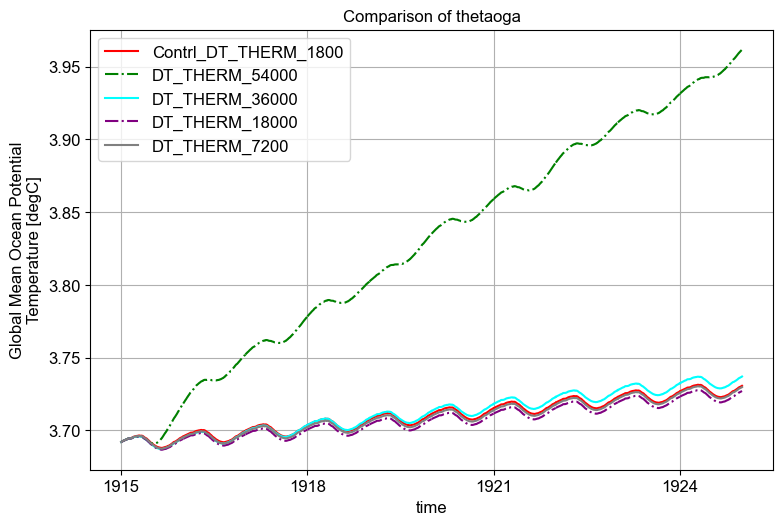

In [53]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green' ,'pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': [0, 2, 4, 6, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots/thetaoga.png'
plot_time_series_combo2(datastore_tot,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

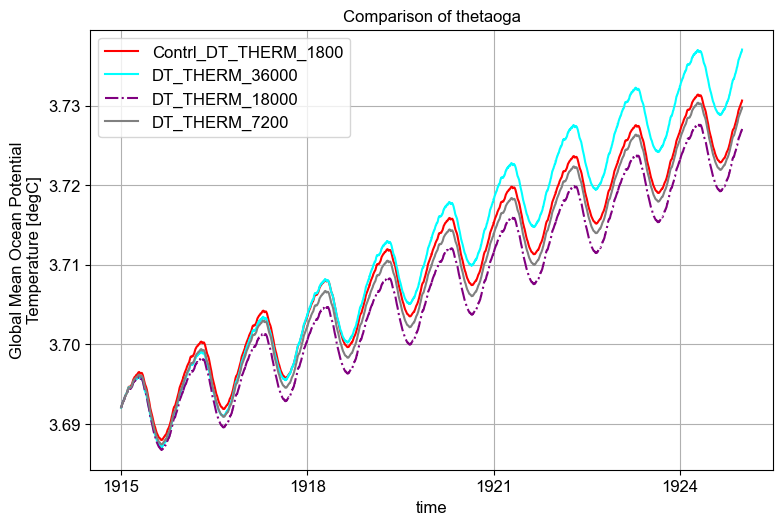

In [55]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green' ,'pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
subplots = [
            {'indices': [0, 4, 6, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots/thetaoga_2.png'
plot_time_series_combo2(datastore_tot,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

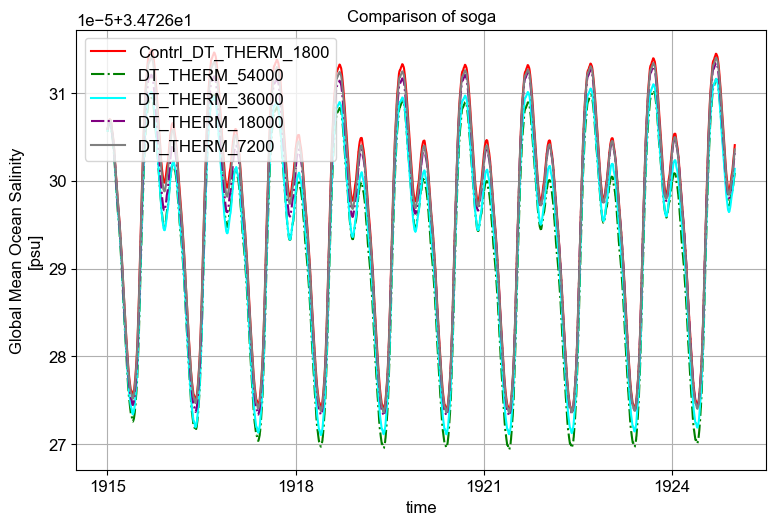

In [52]:
var = 'soga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green' ,'pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
markersize = [2]
subplots = [
            {'indices': [0, 2, 4, 6, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
file_path = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore/10yr-instan-plots/soga.png'

plot_time_series_combo2(datastore_tot,extracted_MOM_names_tot,var,
                        line_style=line_style,
                        line_color=line_color,
                        subplots=subplots,
                        file_path=file_path)

<xarray.DataArray 'T_adx' (time: 12, zl: 50, yh: 300, xq: 360)> Size: 259MB
dask.array<open_dataset-T_adx, shape=(12, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * zl       (zl) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.572e+03
  * time     (time) object 96B 1919-02-01 00:00:00 ... 1920-01-01 00:00:00
Attributes:
    units:          W
    long_name:      Advective (by residual mean) Zonal Flux of Heat
    cell_methods:   zl:sum yh:sum xq:point time: point
    interp_method:  none
<xarray.DataArray 'T_adx' (time: 12, zl: 50, yh: 300, xq: 360)> Size: 259MB
dask.array<open_dataset-T_adx, shape=(12, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh

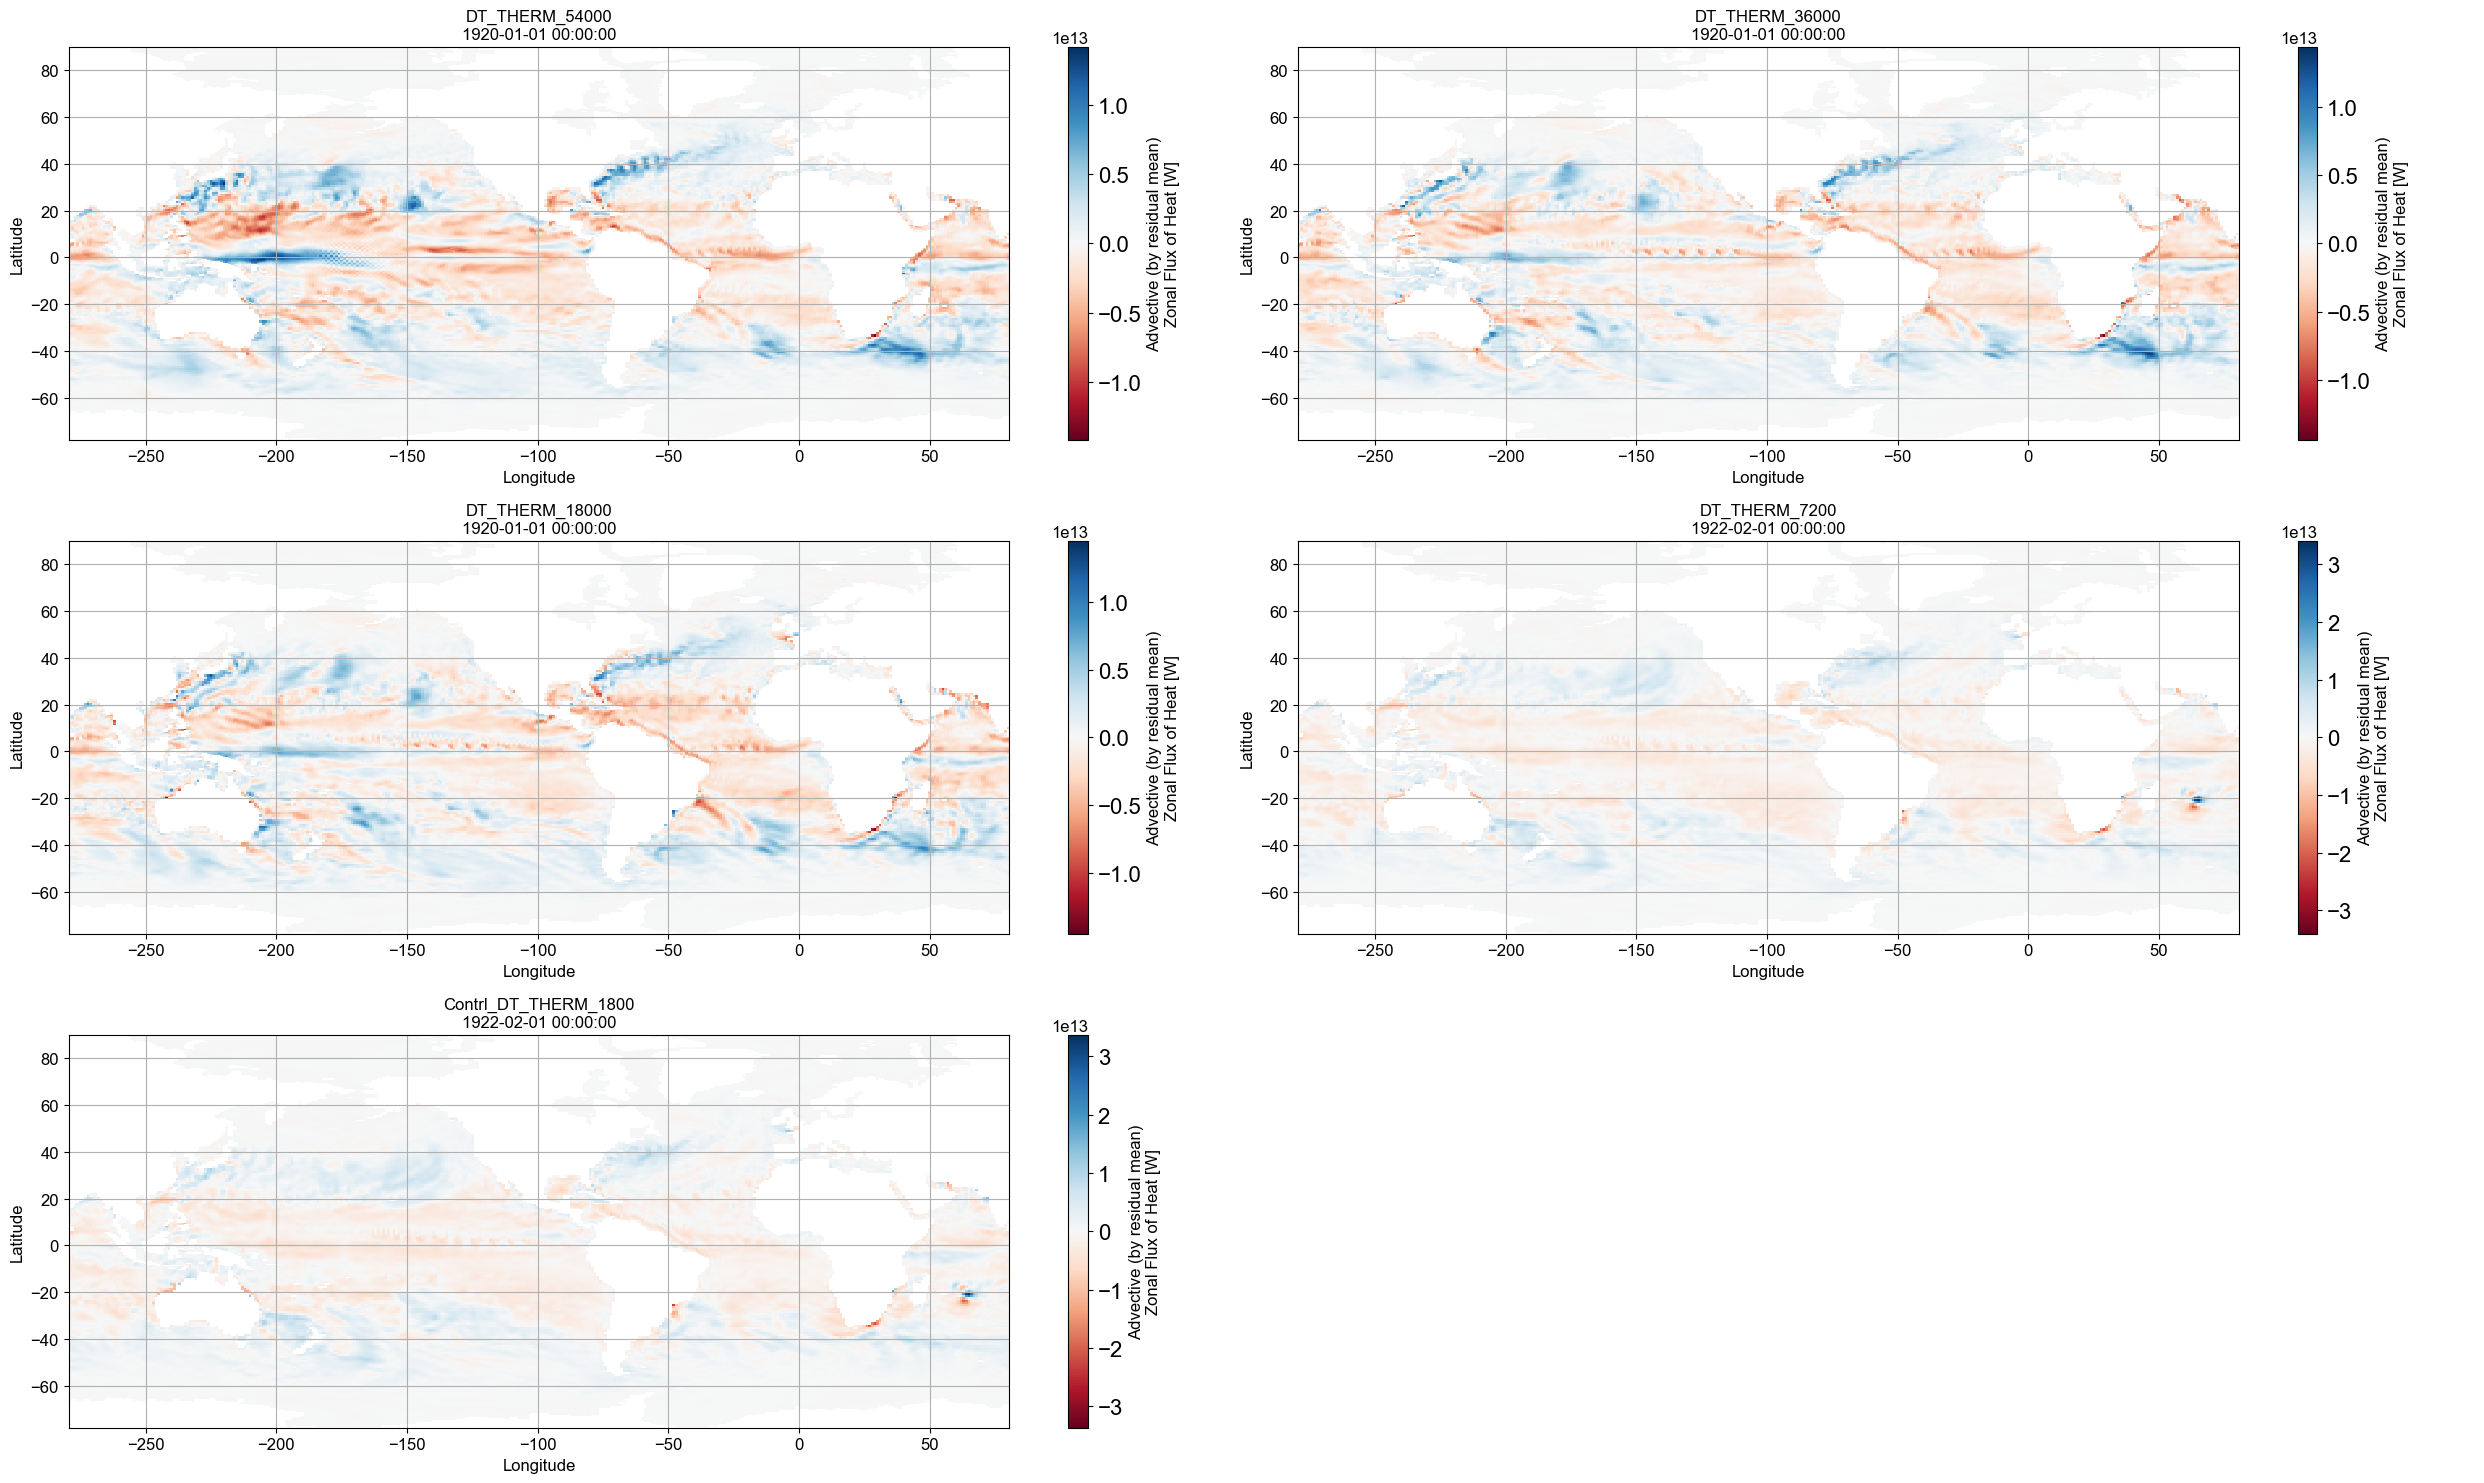

In [80]:
var = 'T_adx'
common_time = pd.Timestamp('1920-12-30 00:00:00')
common_time = cftime.DatetimeNoLeap(common_time.year, common_time.month, common_time.day, 
                                    common_time.hour, common_time.minute, common_time.second)
cbar_range = [-2e13,2e13]
tmp_indx = [2,4,6,8,0]
datastore_expts = [datastore_tot[i] for i in tmp_indx]
MOM_names_expts = [extracted_MOM_names_tot[i] for i in tmp_indx]
datastore_ctrl = datastore_expts[-1]

# plot3d(datastore_expts, MOM_names_expts, var,depth_level = 0,
#        time_selection = 'index', time_index = -1,common_time = common_time,ncols=2,figsize=(25,15))

plot3d2(datastore_expts,
       MOM_names_expts,
       var,
       common_time = common_time,
       ncols=2,
       figsize=(25,15),
       depth_level = 0,)

In [57]:
var = 'T_adx_2d'
datastore_tmp = datastore_tot[1]
cat_subset = datastore_tmp.search(
    variable=[var],
)
pprint(cat_subset)
pprint(type(cat_subset.df))
cat_subset.df.columns.tolist()


<intake_esm_ds catalog with 1 dataset(s) from 2 asset(s)>
<class 'pandas.core.frame.DataFrame'>


['path',
 'realm',
 'variable',
 'frequency',
 'start_date',
 'end_date',
 'variable_long_name',
 'variable_standard_name',
 'variable_cell_methods',
 'variable_units',
 'filename',
 'file_id']

In [43]:
print(cat_subset.df['end_date'])


0    1915-01-02, 06:00:00
1    1915-01-03, 12:00:00
Name: end_date, dtype: object


In [58]:
dset = cat_subset.to_dataset_dict(progressbar=False)
print(type(dset))

key = list(dset.keys())[0]
print(key)
dset_sub = dset[key][var]
print(type(dset_sub))
dir(dset_sub)
dset_sub.isel(time=-1)

<class 'dict'>
access_om3_mom6_2d_T_adx_2d_0seconds_snap_1915.fx
<class 'xarray.core.dataarray.DataArray'>


<xarray.DataArray 'T_adx_2d' (yh: 300, xq: 360)> Size: 432kB
dask.array<getitem, shape=(300, 360), dtype=float32, chunksize=(300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
    time     object 8B 1915-01-03 12:00:00
Attributes:
    units:          W
    long_name:      Vertically Integrated Advective Zonal Flux of Heat
    cell_methods:   yh:sum xq:point time: point
    interp_method:  none

In [136]:
import cmocean as cm
import numpy as np

In [98]:
MOM_names_tot

['DT_THERM_3600_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_108000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_108000',
 'DT_THERM_108000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_54000',
 'DT_THERM_54000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_36000',
 'DT_THERM_36000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_0']

In [ ]:
var = 'T_adx_2d'
for data_store in datastore_tot:
    cat_subset = data_store.search(variable=[var])
    dset = cat_subset.to_dataset_dict(progressbar=False)
    key = list(dset.keys())[0]
    dset_sub = dset[key][var]
    tmp = dset_sub1.isel(time=-1)
    

In [131]:
dset_sub1

<xarray.DataArray 'T_adx_2d' (time: 60, yh: 300, xq: 360)> Size: 26MB
dask.array<concatenate, shape=(60, 300, 360), dtype=float32, chunksize=(1, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * time     (time) object 480B 1915-01-01 01:00:00 ... 1915-01-03 12:00:00
Attributes:
    units:          W
    long_name:      Vertically Integrated Advective Zonal Flux of Heat
    cell_methods:   yh:sum xq:point time: point
    interp_method:  none

In [69]:
import datetime

# Define the starting date
start_date = datetime.datetime(1900, 1, 1, 0, 0, 0)
start_date = datetime.datetime(1900, 1, 1)

# Timestamp to convert (in seconds since the start_date)
timestamp = 473076000
timestamp = 3650.5
# Calculate the resulting date
resulting_date = start_date + datetime.timedelta(seconds=timestamp)
resulting_date = start_date + datetime.timedelta(days=timestamp)
# Print the date in a readable format
print(resulting_date.strftime('%Y-%m-%d %H:%M:%S'))

1910-01-14 12:00:00


<class 'intake_esm.core.esm_datastore'>

--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_id.frequency'


<class 'dict'>
access_om3_mom6_3d_T_adx_0seconds_snap_1915.fx


<xarray.DataArray 'T_adx' (time: 2, zl: 50, yh: 300, xq: 360)> Size: 43MB
dask.array<concatenate, shape=(2, 50, 300, 360), dtype=float32, chunksize=(1, 25, 150, 180), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * zl       (zl) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.572e+03
  * time     (time) object 16B 1915-01-02 06:00:00 1915-01-03 12:00:00
Attributes:
    units:          W
    long_name:      Advective (by residual mean) Zonal Flux of Heat
    cell_methods:   zl:sum yh:sum xq:point time: point
    interp_method:  none

In [ ]:
dset[key][var].plot(label = MOM_names[1])
plt.title(f"Comparison of {var}")
plt.legend(loc='best')
plt.grid()


In [73]:
var = 'T_adx'
datastore_tmp = datastore_tot[1]
cat_subset = datastore_tmp.search(
    variable=[var]
)
df = cat_subset.df
cat_subset.keys_info()
dsets = cat_subset.to_dataset_dict()
print(dsets)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_id.frequency'


{'access_om3_mom6_3d_T_adx_0seconds_snap_1915.fx': <xarray.Dataset> Size: 43MB
Dimensions:  (time: 2, zl: 50, yh: 300, xq: 360)
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * zl       (zl) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.572e+03
  * time     (time) object 16B 1915-01-02 06:00:00 1915-01-03 12:00:00
Data variables:
    T_adx    (time, zl, yh, xq) float32 43MB dask.array<chunksize=(1, 25, 150, 180), meta=np.ndarray>
Attributes: (12/16)
    NumFilesInSet:                            1
    title:                                    ACCESS-OM3
    grid_type:                                regular
    grid_tile:                                N/A
    intake_esm_vars:                          ['T_adx']
    intake_esm_attrs:realm:                   ocean
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   ['zl:su

In [80]:
list(dsets.keys())[0]

'access_om3_mom6_3d_T_adx_0seconds_snap_1915.fx'

In [84]:
dsets.values()[]

dict_values([<xarray.Dataset> Size: 43MB
Dimensions:  (time: 2, zl: 50, yh: 300, xq: 360)
Coordinates:
  * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
  * zl       (zl) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.572e+03
  * time     (time) object 16B 1915-01-02 06:00:00 1915-01-03 12:00:00
Data variables:
    T_adx    (time, zl, yh, xq) float32 43MB dask.array<chunksize=(1, 25, 150, 180), meta=np.ndarray>
Attributes: (12/16)
    NumFilesInSet:                            1
    title:                                    ACCESS-OM3
    grid_type:                                regular
    grid_tile:                                N/A
    intake_esm_vars:                          ['T_adx']
    intake_esm_attrs:realm:                   ocean
    ...                                       ...
    intake_esm_attrs:variable_cell_methods:   ['zl:sum yh:sum xq:point time: ...
    intake

In [157]:
var = 'T_adx'
datastore_tmp = datastore_tot[0]
cat_subset = datastore_tmp.search(
    variable=[var]
)
dsets2 = cat_subset.df
dsets2

path  realm variable  \
0  /g/data/tm70/ml0072/COMMON/git_repos/Expts_man...  ocean  [T_adx]   
1  /g/data/tm70/ml0072/COMMON/git_repos/Expts_man...  ocean  [T_adx]   

  frequency            start_date              end_date  \
0       1hr  1915-01-01, 00:30:00  1915-01-02, 06:30:00   
1       1hr  1915-01-02, 06:30:00  1915-01-03, 12:30:00   

                                  variable_long_name variable_standard_name  \
0  ['Advective (by residual mean) Zonal Flux of H...                   ['']   
1  ['Advective (by residual mean) Zonal Flux of H...                   ['']   

                    variable_cell_methods variable_units  \
0  ['zl:sum yh:sum xq:point time: point']          ['W']   
1  ['zl:sum yh:sum xq:point time: point']          ['W']   

                                          filename  \
0  access-om3.mom6.3d.T_adx.0seconds.snap._1915.nc   
1  access-om3.mom6.3d.T_adx.0seconds.snap._1915.nc   

                                       file_id  
0  access_om3_mom6_3d_T_adx_0seconds_snap_1915  
1  access_om3_mom6_3d_T_adx_0seconds_snap_1915

In [158]:
var = 'T_adx'
datastore_tmp = datastore_tot[1]
cat_subset = datastore_tmp.search(
    variable=[var]
)
dsets2 = cat_subset.df
dsets2

path  realm variable  \
0  /g/data/tm70/ml0072/COMMON/git_repos/Expts_man...  ocean  [T_adx]   
1  /g/data/tm70/ml0072/COMMON/git_repos/Expts_man...  ocean  [T_adx]   

  frequency            start_date              end_date  \
0        fx  1915-01-02, 06:00:00  1915-01-02, 06:00:00   
1        fx  1915-01-03, 12:00:00  1915-01-03, 12:00:00   

                                  variable_long_name variable_standard_name  \
0  ['Advective (by residual mean) Zonal Flux of H...                   ['']   
1  ['Advective (by residual mean) Zonal Flux of H...                   ['']   

                    variable_cell_methods variable_units  \
0  ['zl:sum yh:sum xq:point time: point']          ['W']   
1  ['zl:sum yh:sum xq:point time: point']          ['W']   

                                          filename  \
0  access-om3.mom6.3d.T_adx.0seconds.snap._1915.nc   
1  access-om3.mom6.3d.T_adx.0seconds.snap._1915.nc   

                                       file_id  
0  access_om3_mom6_3d_T_adx_0seconds_snap_1915  
1  access_om3_mom6_3d_T_adx_0seconds_snap_1915

In [159]:
var = 'T_adx'
datastore_tmp = datastore_tot[-1]
cat_subset = datastore_tmp.search(
    variable=[var]
)
dsets2 = cat_subset.df
dsets2

path  realm variable  \
0  /g/data/tm70/ml0072/COMMON/git_repos/Expts_man...  ocean  [T_adx]   
1  /g/data/tm70/ml0072/COMMON/git_repos/Expts_man...  ocean  [T_adx]   

  frequency            start_date              end_date  \
0       2hr  1915-01-01, 01:00:00  1915-01-02, 07:00:00   
1       2hr  1915-01-02, 07:00:00  1915-01-03, 13:00:00   

                                  variable_long_name variable_standard_name  \
0  ['Advective (by residual mean) Zonal Flux of H...                   ['']   
1  ['Advective (by residual mean) Zonal Flux of H...                   ['']   

                    variable_cell_methods variable_units  \
0  ['zl:sum yh:sum xq:point time: point']          ['W']   
1  ['zl:sum yh:sum xq:point time: point']          ['W']   

                                          filename  \
0  access-om3.mom6.3d.T_adx.0seconds.snap._1915.nc   
1  access-om3.mom6.3d.T_adx.0seconds.snap._1915.nc   

                                       file_id  
0  access_om3_mom6_3d_T_adx_0seconds_snap_1915  
1  access_om3_mom6_3d_T_adx_0seconds_snap_1915

In [36]:
dsets = cat_subset.to_dataset_dict()
dsets


--> The keys in the returned dictionary of datasets are constructed as follows:
	'file_id.frequency'


{'access_om3_mom6_3d_T_adx_0seconds_snap_1915.2hr': <xarray.Dataset> Size: 648MB
 Dimensions:  (time: 30, zl: 50, yh: 300, xq: 360)
 Coordinates:
   * xq       (xq) float64 3kB -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
   * yh       (yh) float64 2kB -77.88 -77.63 -77.38 -77.13 ... 88.87 89.32 89.77
   * zl       (zl) float64 400B 1.152 3.649 6.565 ... 5.034e+03 5.572e+03
   * time     (time) object 240B 1915-01-01 02:00:00 ... 1915-01-03 12:00:00
 Data variables:
     T_adx    (time, zl, yh, xq) float32 648MB dask.array<chunksize=(1, 25, 150, 180), meta=np.ndarray>
 Attributes: (12/16)
     NumFilesInSet:                            1
     title:                                    ACCESS-OM3
     grid_type:                                regular
     grid_tile:                                N/A
     intake_esm_vars:                          ['T_adx']
     intake_esm_attrs:realm:                   ocean
     ...                                       ...
     intake_esm_attrs:variab

In [32]:
datastore_tmp.keys()

['access_om3_cice_h_XXXX_XX_XX.18hr',
 'access_om3_cice_h_XXXX_XX_XX.1day',
 'access_om3_mom6_2d_Heat_PmE_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_Rd_dx_0seconds_snap_1915.1hr',
 'access_om3_mom6_2d_SSH_0seconds_snap_1915.1hr',
 'access_om3_mom6_2d_SSU_0seconds_snap_1915.1hr',
 'access_om3_mom6_2d_SSV_0seconds_snap_1915.1hr',
 'access_om3_mom6_2d_S_adx_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_S_ady_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_S_diffx_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_S_diffy_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_T_adx_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_T_ady_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_T_diffx_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_T_diffy_2d_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_evs_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_ficeberg_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_friver_0seconds_snap_1915.2hr',
 'access_om3_mom6_2d_fsitherm_0seconds_snap_1915.2hr',
 'acce

In [5]:
indices = [0,1]
var = 'thetaoga'
for i in indices:
    datastore_tmp = datastore_tot[i].search(variable=var)
    dataset_dict = datastore_tmp.to_dataset_dict(progressbar=False)
    dataset = dataset_dict[next(iter(dataset_dict))]
    data = set_time_range(dataset, var, time_range)
    data.plot(label = MOM_names[i],
                     linestyle = line_style[i%len(line_style)],
                     color = line_color[i%len(line_color)],
                     marker = line_marker[i%len(line_marker)])
if ylims is not None:
    plt.ylim(ylims)
plt.title(f"Comparison of {var}")
plt.legend(loc='best')
plt.grid()

plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlabel(plt.gca().get_xlabel(), fontsize=label_fontsize)
plt.ylabel(plt.gca().get_ylabel(), fontsize=label_fontsize)

NameError: name 'datastore_tot' is not defined

In [4]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green','pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
time_range = ('1900-01-01','1900-01-15')
time_range = None
plot_time_series_combo2(datastore_tot,MOM_names,var,indices=[0,1,2],
                      line_style=line_style,
                      line_color=line_color,
                      line_marker=line_marker,
                      figsize=(23,16),time_range=time_range)

NameError: name 'datastore_tot' is not defined

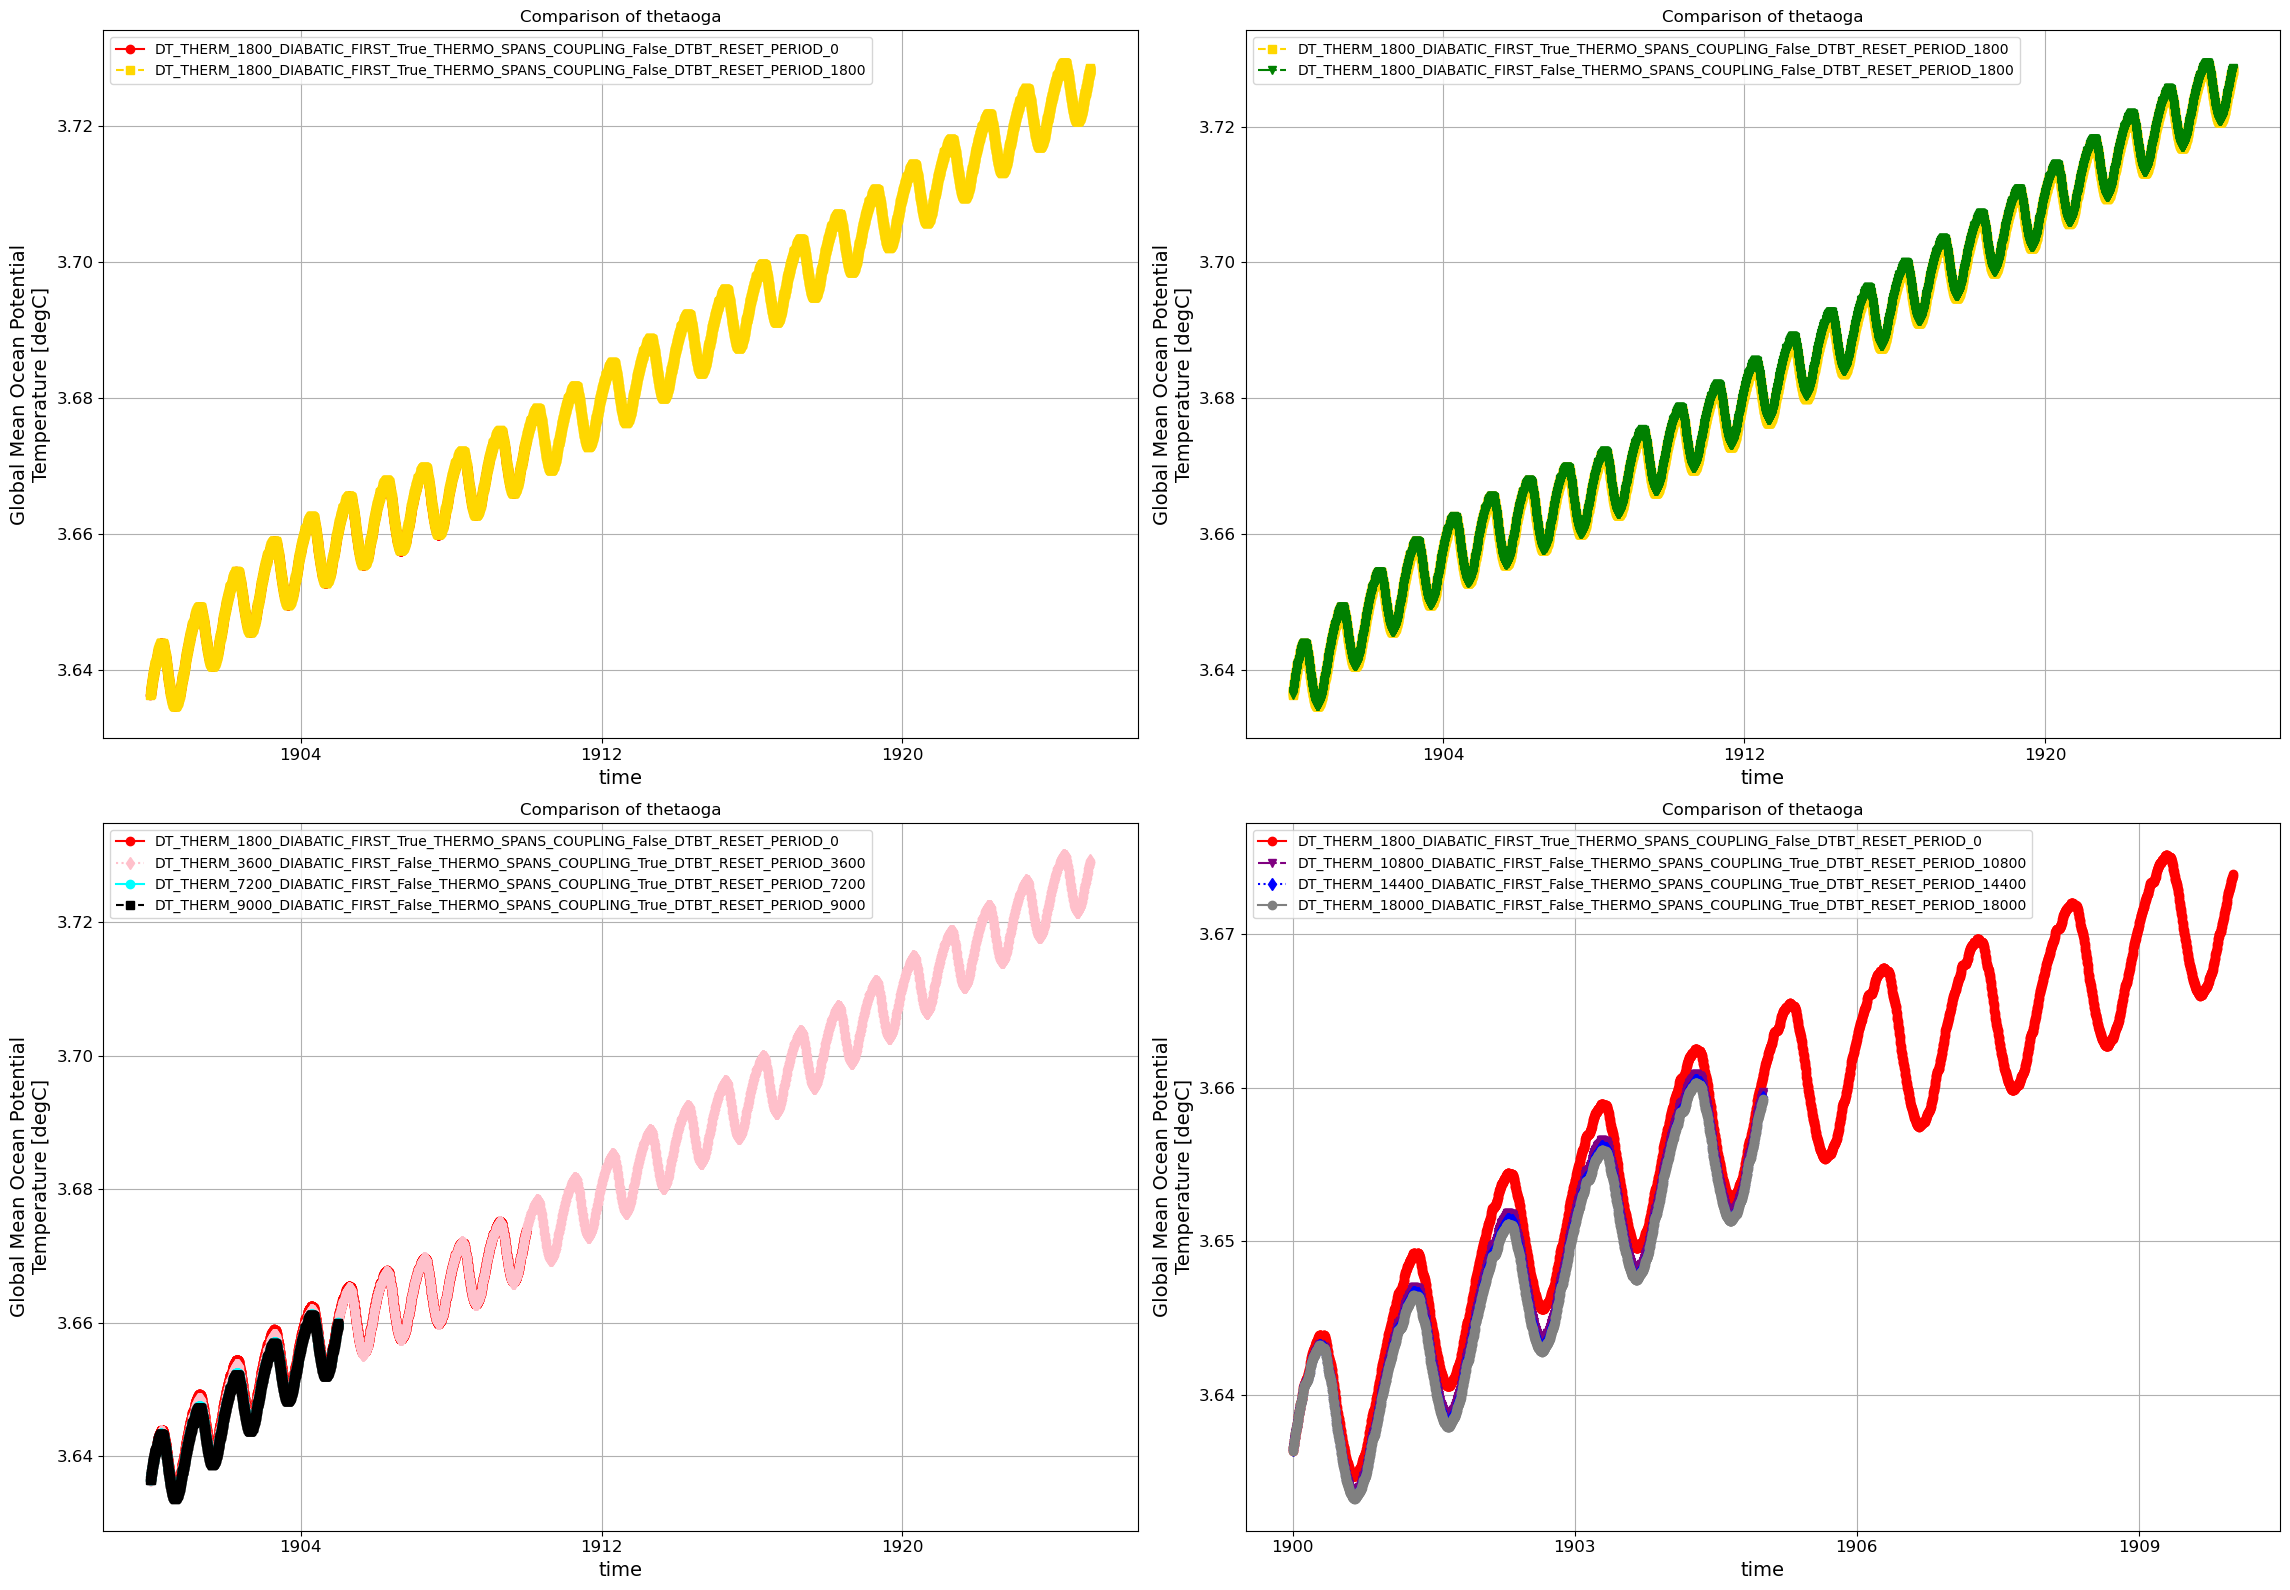

In [11]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green' ,'pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
subplots = [{'indices': [0, 1], 'subplot': (2, 2, 1), 'title': 'DTBT_RESET_PERIOD', 'difference': None},  
            {'indices': [1, 2], 'subplot': (2, 2, 2), 'title': 'DIABATIC_FIRST'   , 'difference': None},
            {'indices': [0, 3, 4, 5], 'subplot': (2, 2, 3), 'title': 'DT_THERM', 'difference': None, 'legend_loc': 'upper left'},  
            {'indices': [0, 6, 7, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
#time_range = ('1900-01-01','1904-12-31')
time_range = None
plot_time_series_combo2(datastore_tot,MOM_names,var,
                      line_style=line_style,
                      line_color=line_color,
                      line_marker=line_marker,
                      figsize=(23,16),subplots=subplots,time_range=time_range)

KeyError: 'thetaoga'

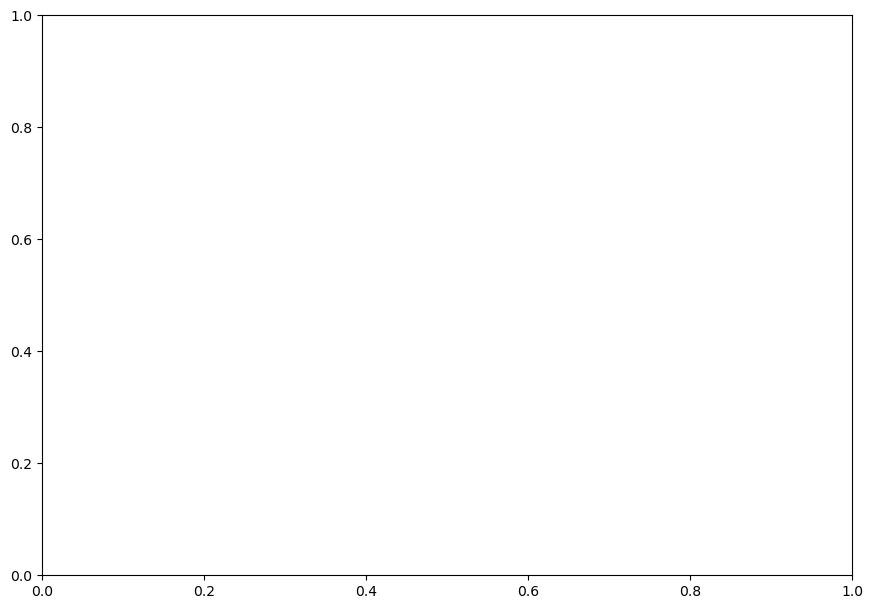

In [46]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','blue' ,'lightgreen' ,'magenta']
line_marker = ['o','s','v' ,'d']
subplots = [{'indices': [0, 1], 'subplot': (2, 2, 1), 'title': 'DTBT_RESET_PERIOD', 'difference': 0},  
            {'indices': [1, 2], 'subplot': (2, 2, 2), 'title': 'DIABATIC_FIRST'   , 'difference': 1},
            {'indices': [0, 3, 4, 5], 'subplot': (2, 2, 3), 'title': 'DT_THERM', 'difference': 0, 'legend_loc': 'upper left'},  
            {'indices': [0, 6, 7, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': 0, 'legend_loc': 'upper left'},
           ]
time_range = ('1900-01-01','1900-01-15')
time_range = None
plot_time_series_combo2(datastore_tot,MOM_names,var,
                      line_style=line_style,
                      line_color=line_color,
                      line_marker=line_marker,
                      figsize=(23,16),subplots=subplots,time_range=time_range)